Epoch 1/30
Generated images:


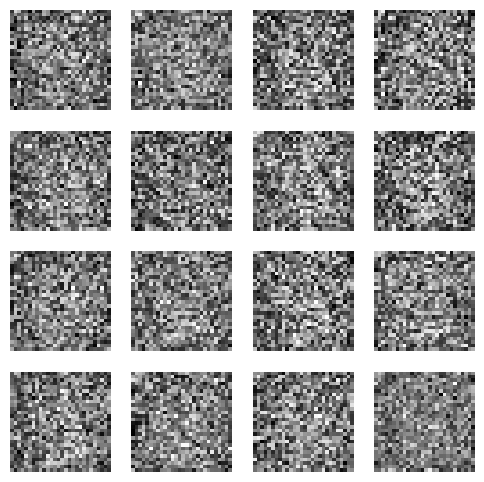

Real images:


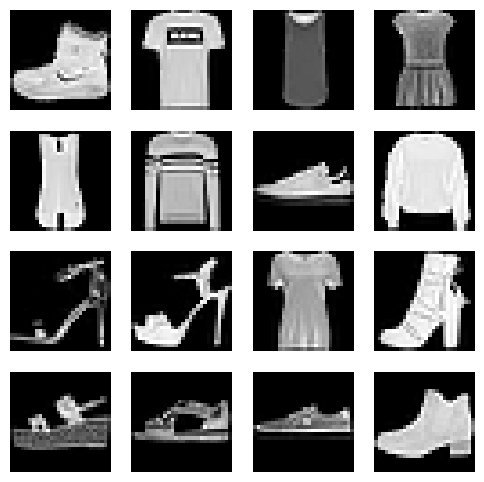

Epoch 2/30
Generated images:


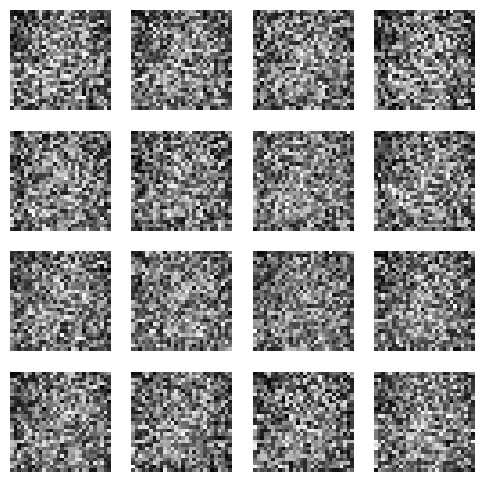

Real images:


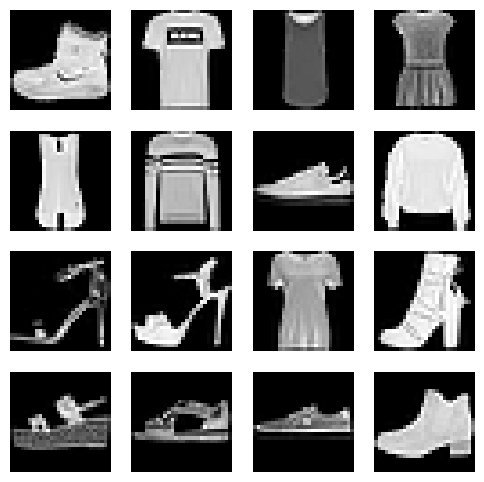

Epoch 3/30
Generated images:


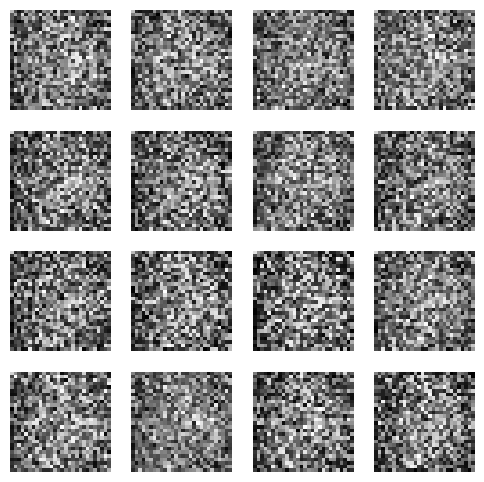

Real images:


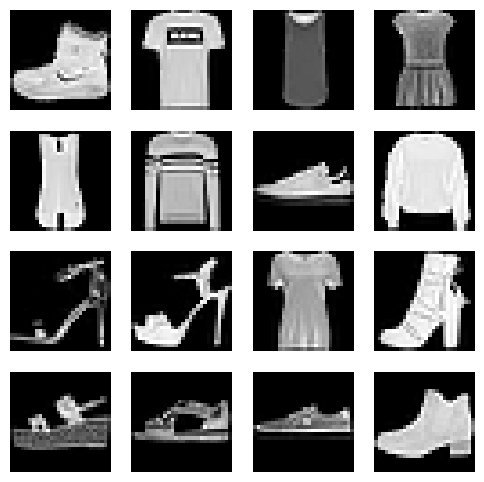

Epoch 4/30
Generated images:


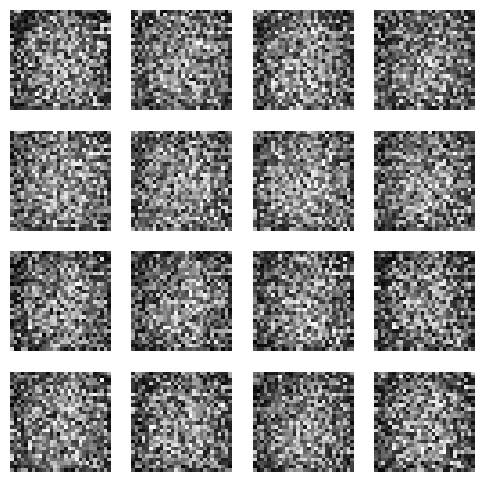

Real images:


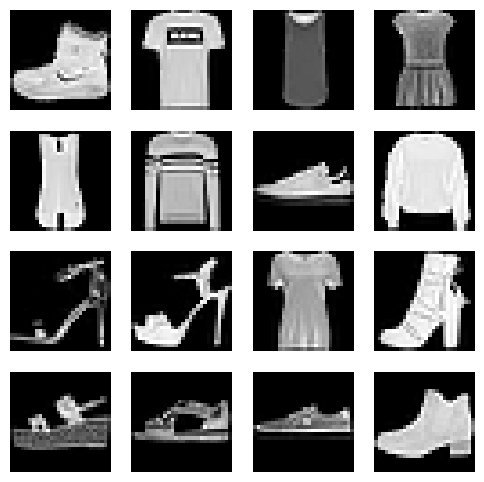

Epoch 5/30
Generated images:


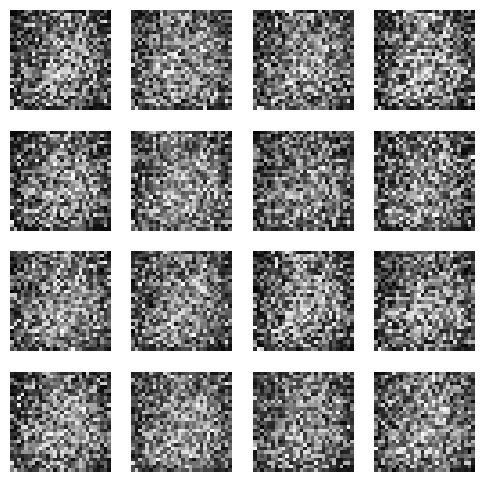

Real images:


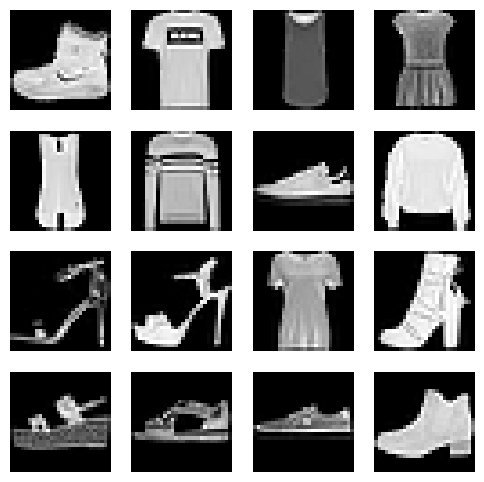

Epoch 6/30
Generated images:


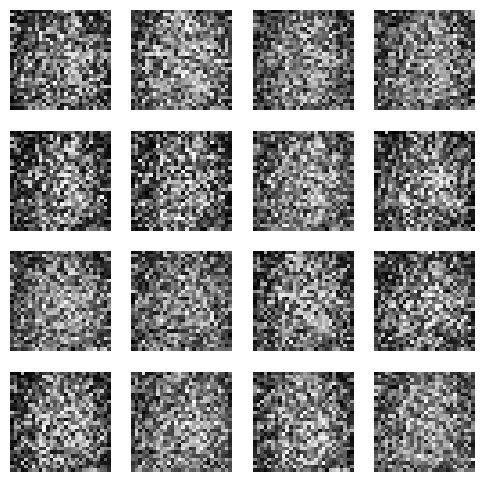

Real images:


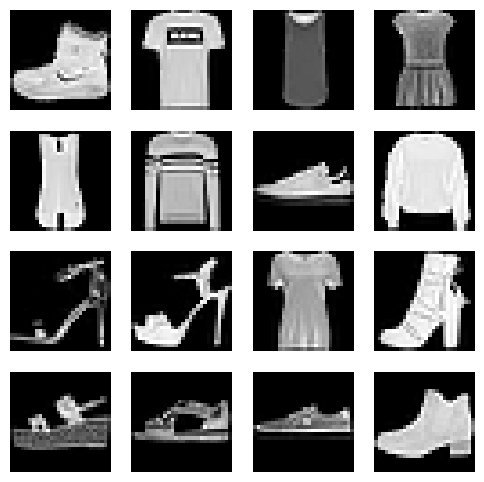

Epoch 7/30
Generated images:


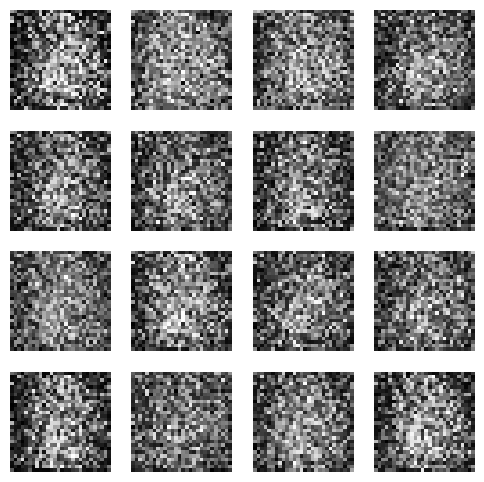

Real images:


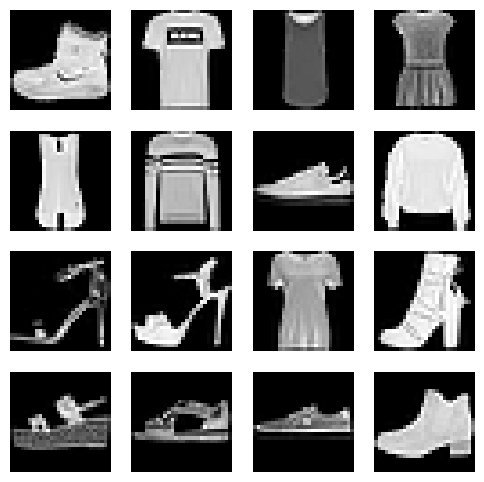

Epoch 8/30
Generated images:


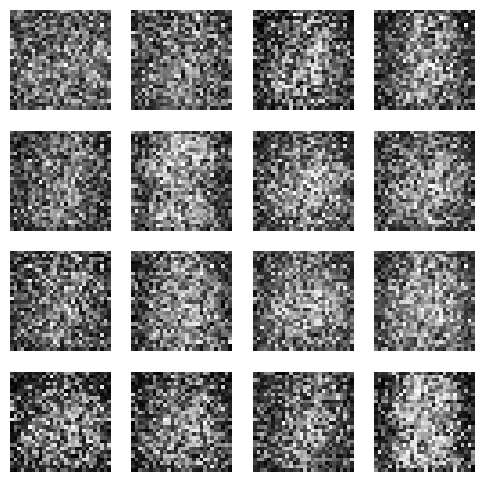

Real images:


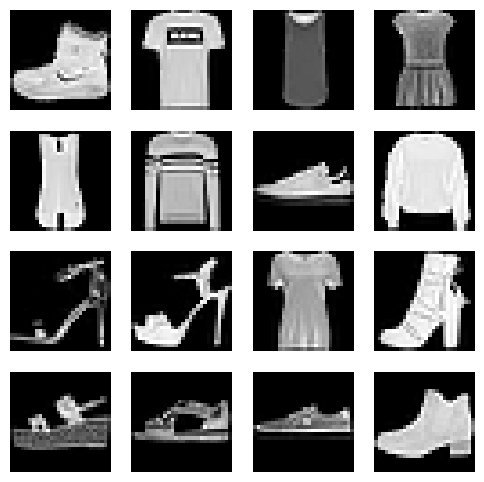

Epoch 9/30
Generated images:


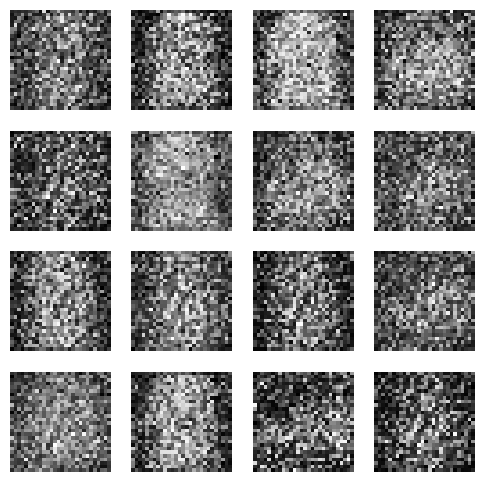

Real images:


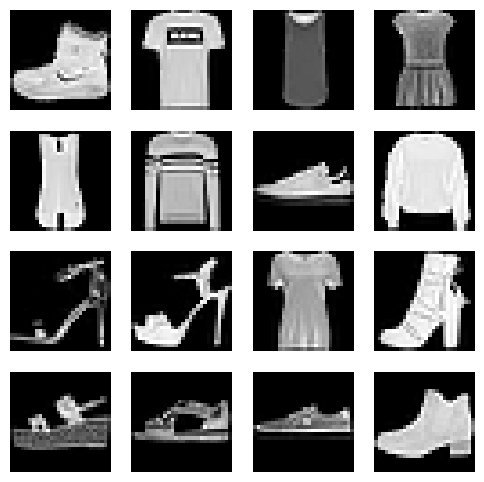

Epoch 10/30
Generated images:


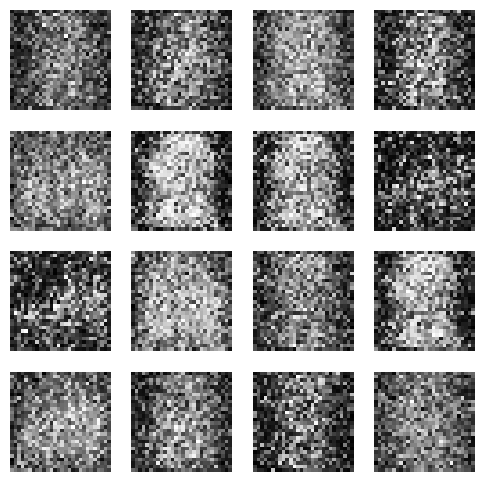

Real images:


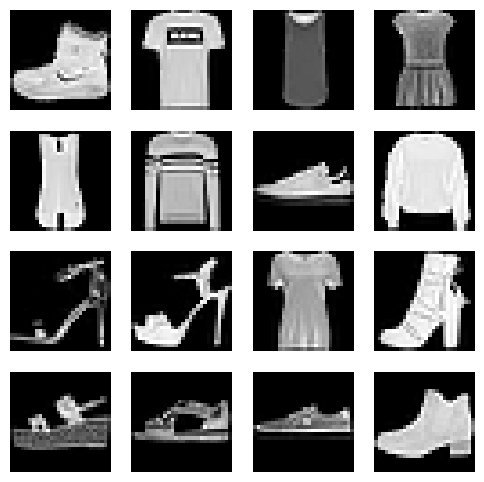

Epoch 11/30
Generated images:


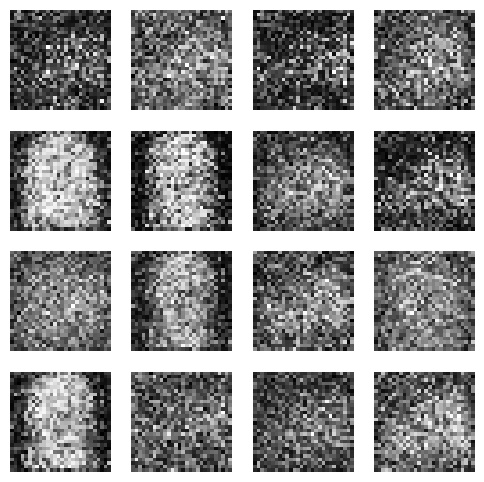

Real images:


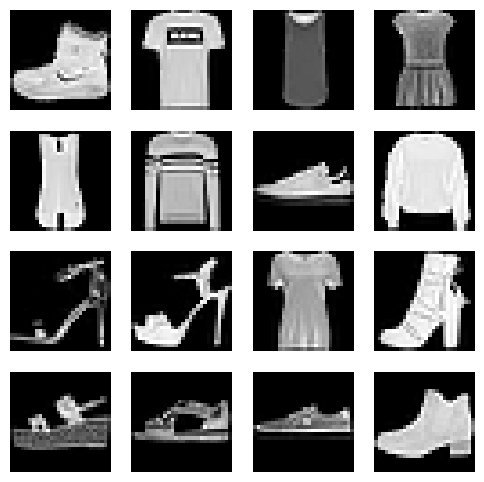

Epoch 12/30
Generated images:


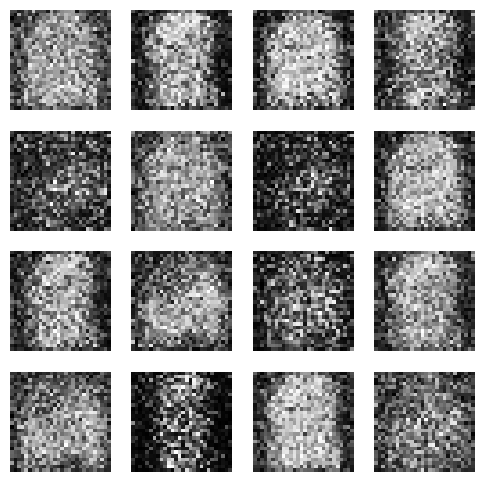

Real images:


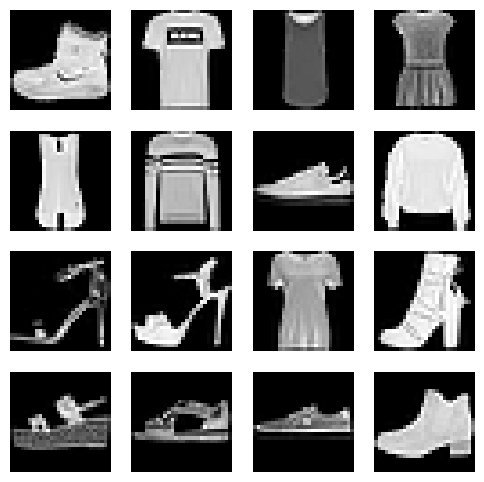

Epoch 13/30
Generated images:


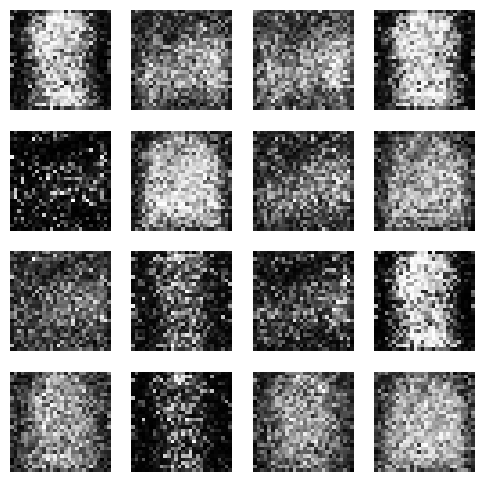

Real images:


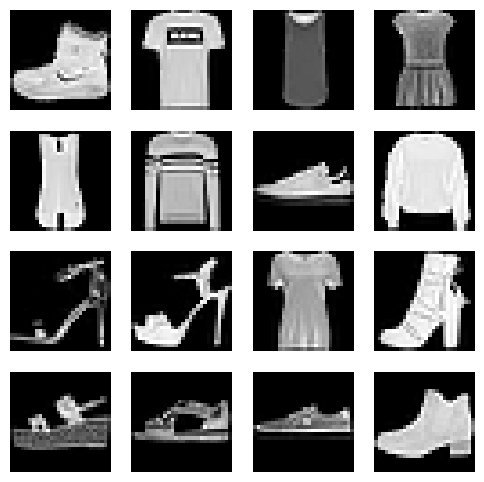

Epoch 14/30
Generated images:


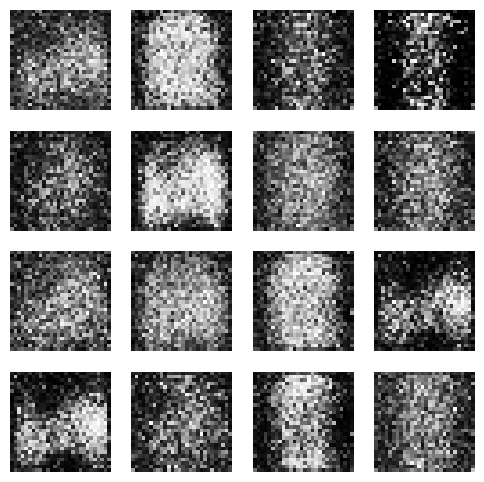

Real images:


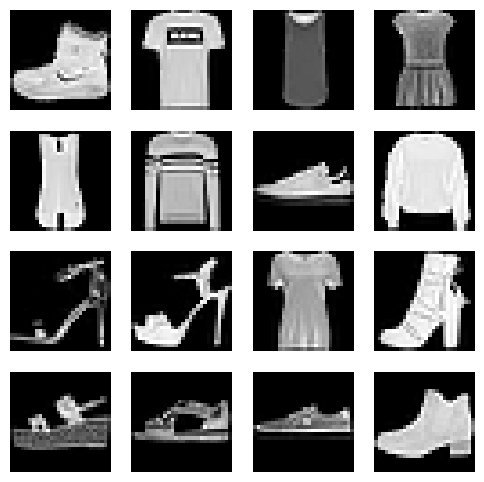

Epoch 15/30
Generated images:


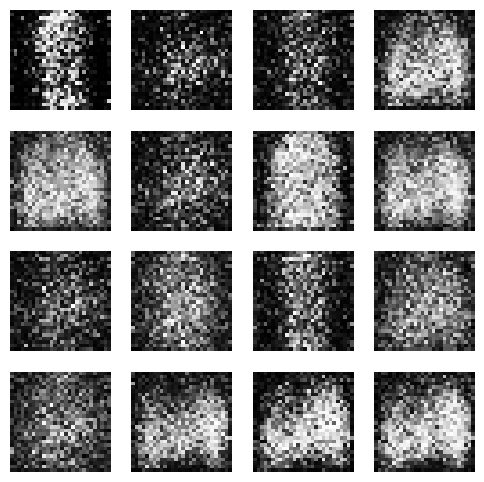

Real images:


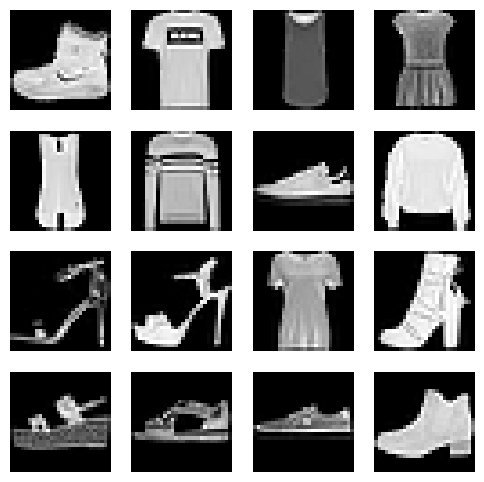

Epoch 16/30
Generated images:


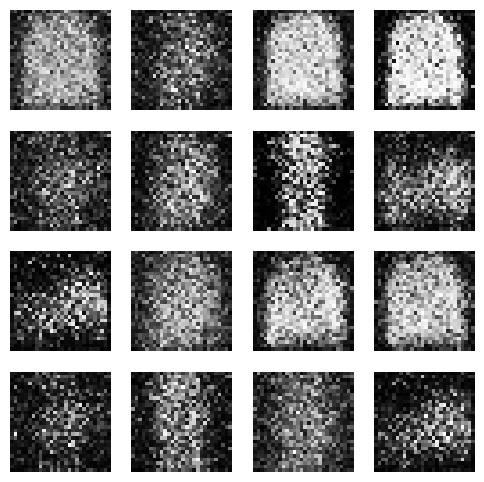

Real images:


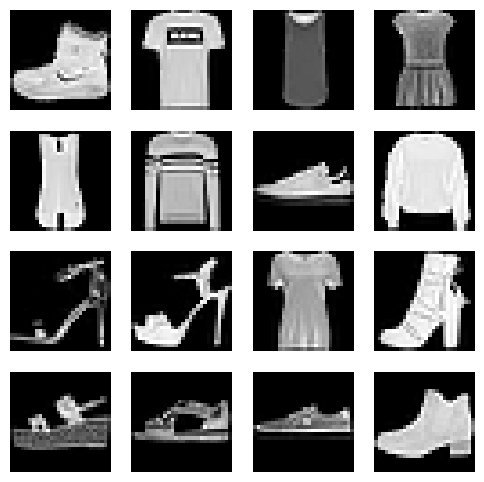

Epoch 17/30
Generated images:


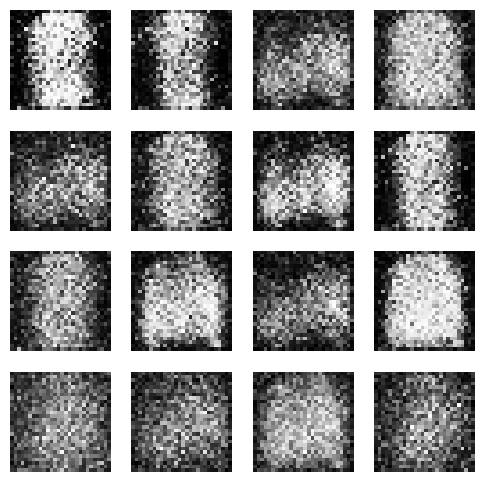

Real images:


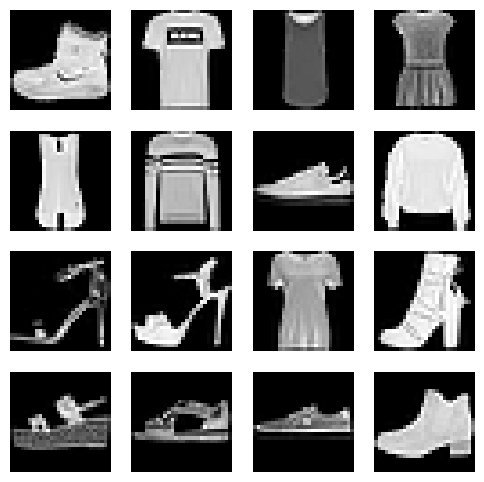

Epoch 18/30
Generated images:


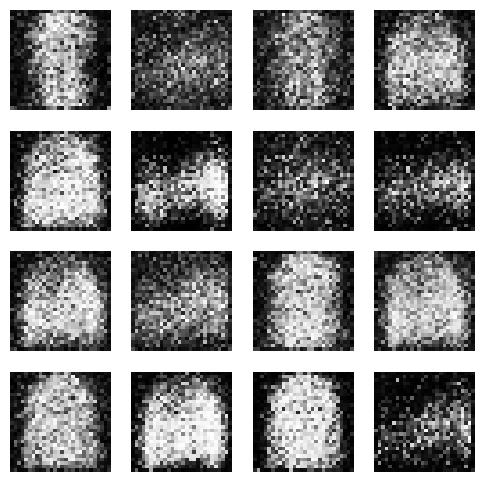

Real images:


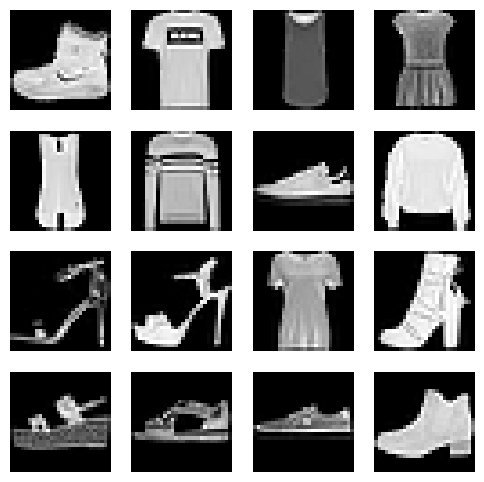

Epoch 19/30
Generated images:


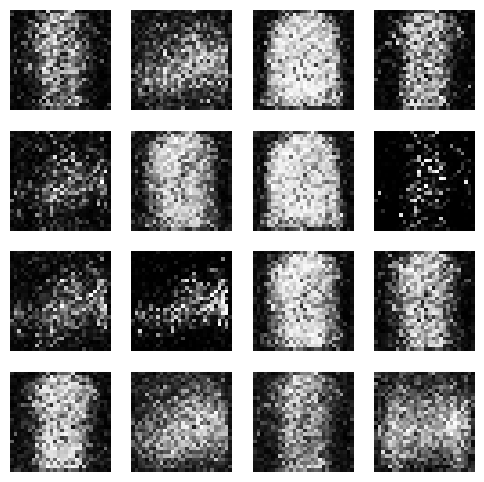

Real images:


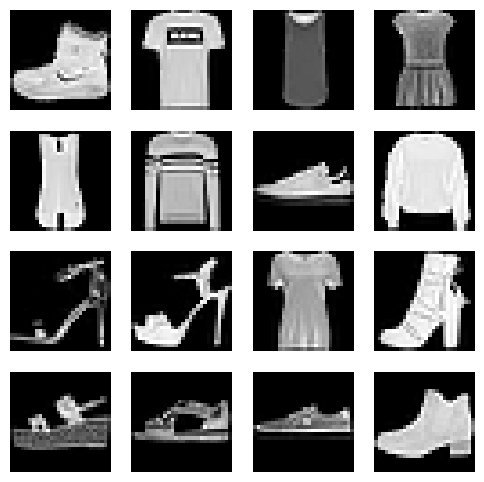

Epoch 20/30
Generated images:


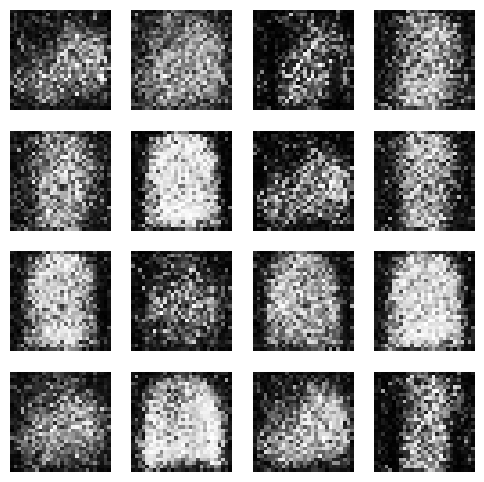

Real images:


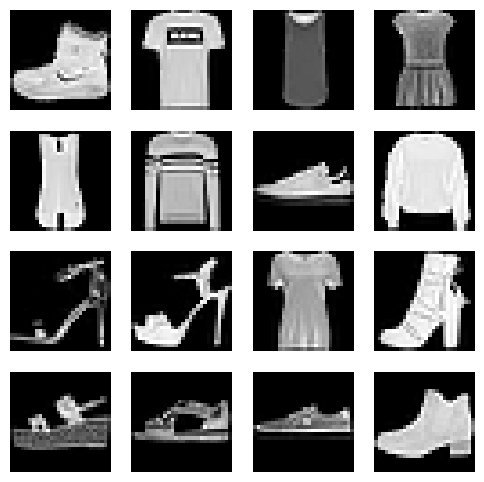

Epoch 21/30
Generated images:


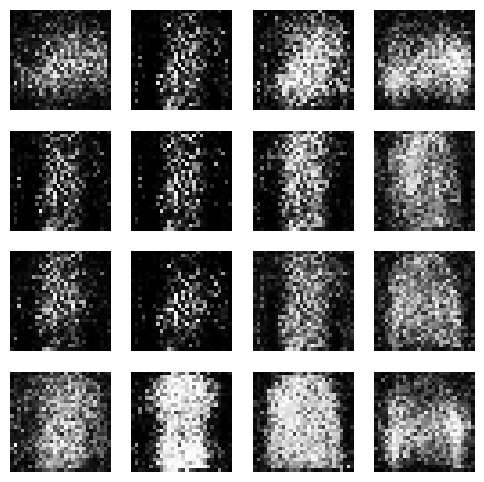

Real images:


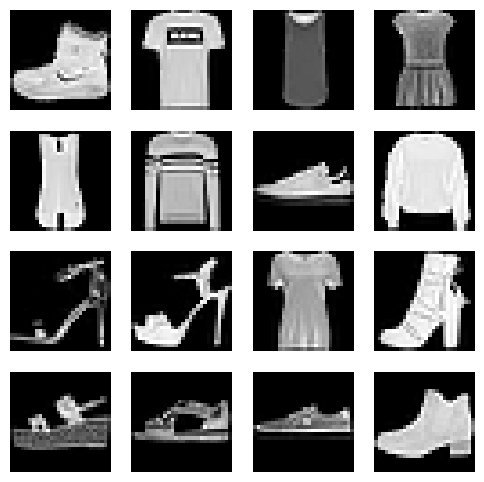

Epoch 22/30
Generated images:


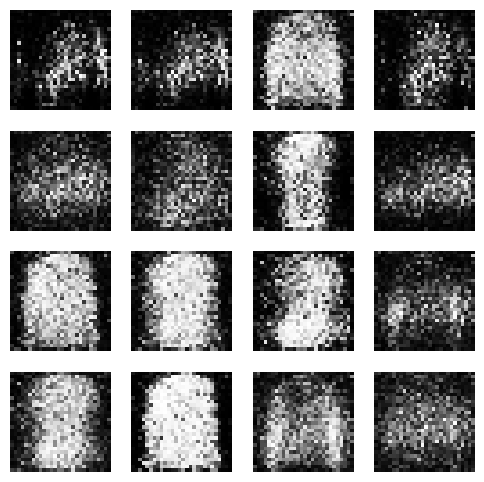

Real images:


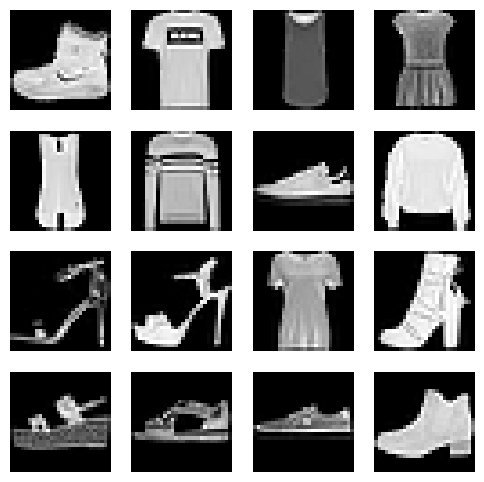

Epoch 23/30
Generated images:


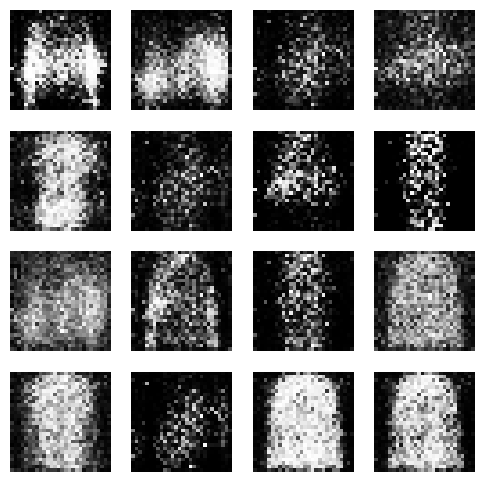

Real images:


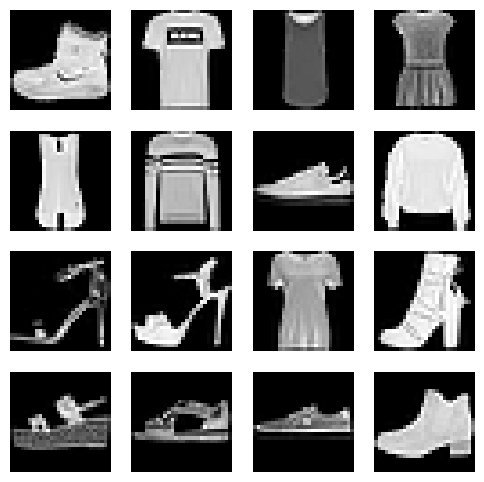

Epoch 24/30
Generated images:


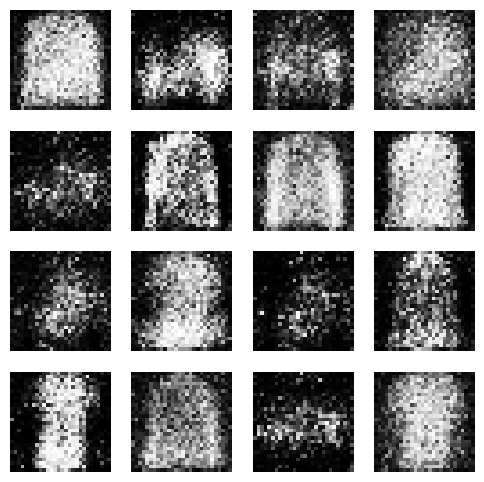

Real images:


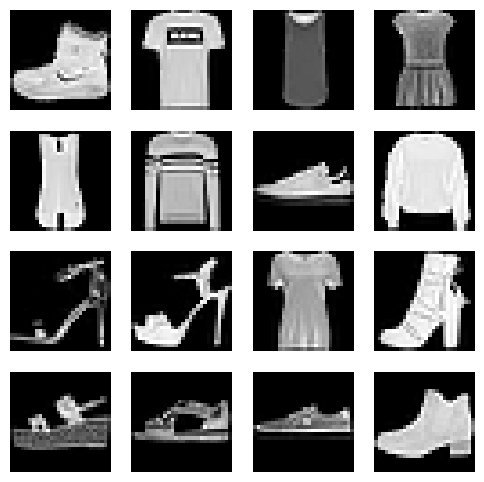

Epoch 25/30
Generated images:


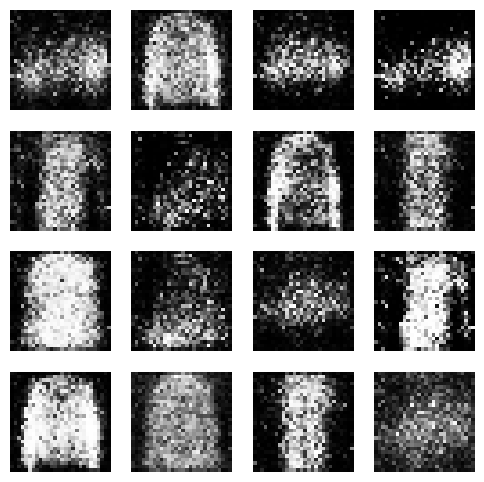

Real images:


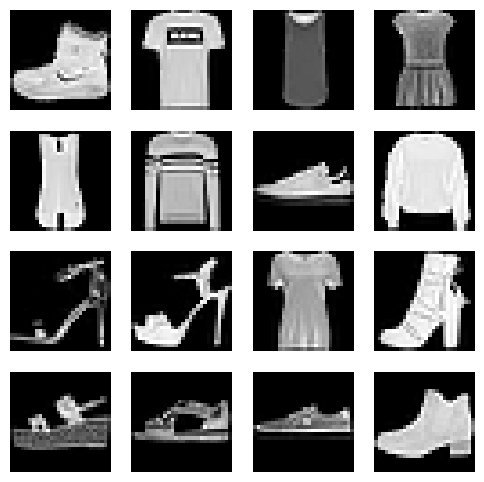

Epoch 26/30
Generated images:


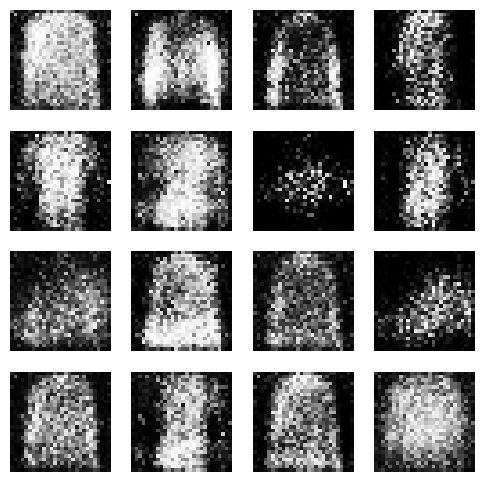

Real images:


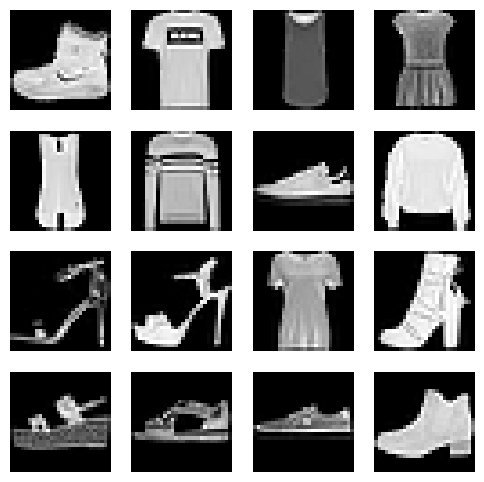

Epoch 27/30
Generated images:


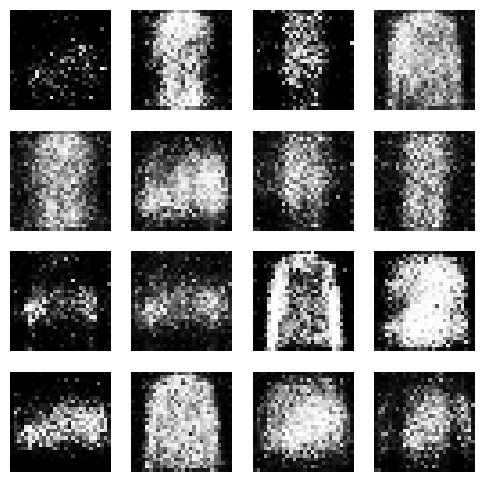

Real images:


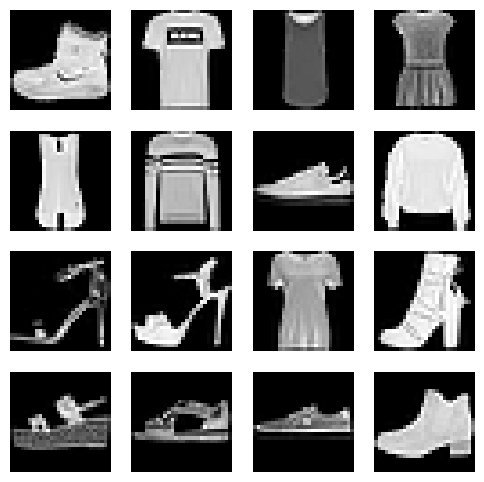

Epoch 28/30
Generated images:


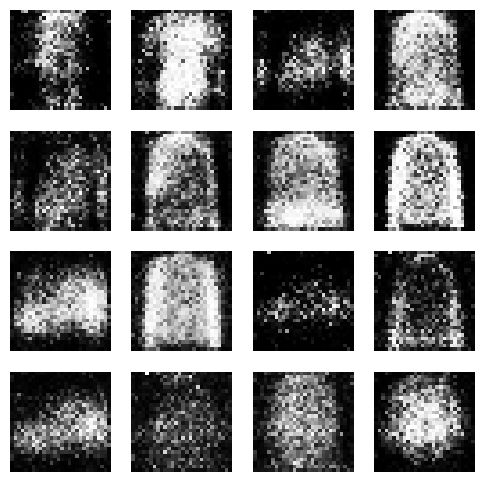

Real images:


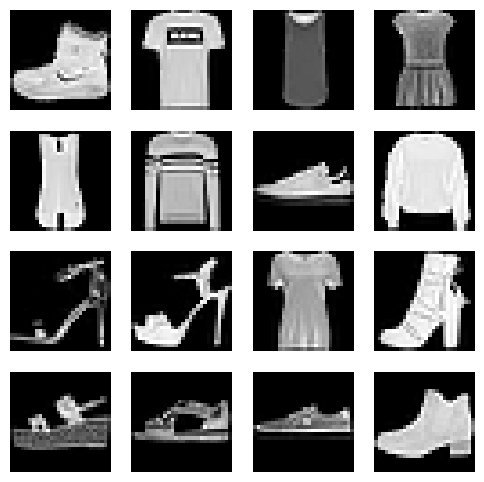

Epoch 29/30
Generated images:


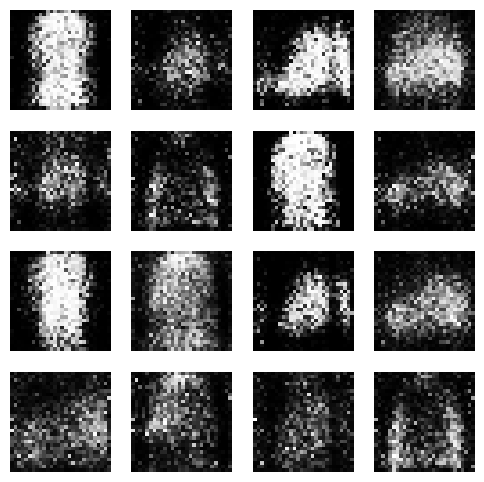

Real images:


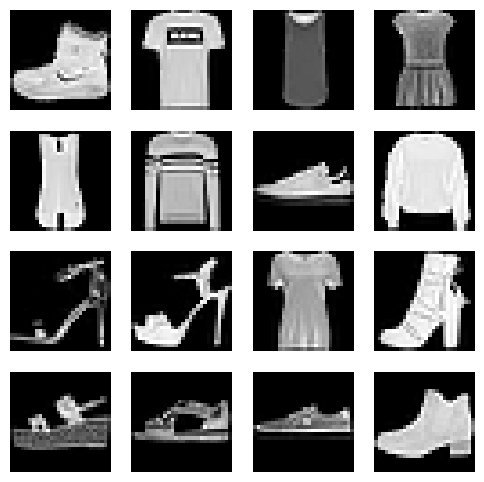

Epoch 30/30
Generated images:


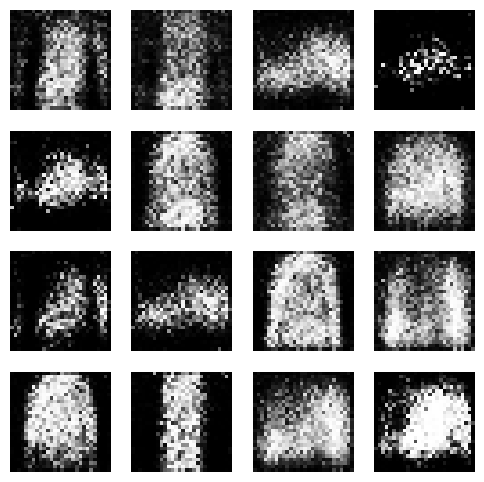

Real images:


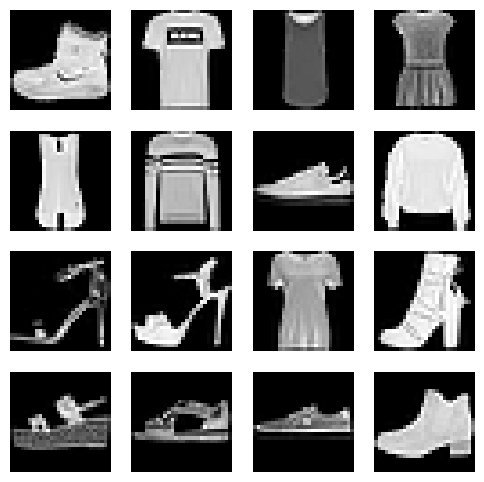

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the Fashion-MNIST dataset
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = (X_train - 127.5) / 127.5  # Normalize to [-1, 1] range
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

# Set constants
BATCH_SIZE = 256
NOISE_DIM = 100
EPOCHS = 30

# Prepare the dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(60000).batch(BATCH_SIZE)

# Define the Generator model
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, input_shape=(NOISE_DIM,)),
        layers.LeakyReLU(),
        layers.Dense(784, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Define the Discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128),
        layers.LeakyReLU(),
        layers.Dense(1)
    ])
    return model

# Create generator and discriminator models
generator = build_generator()
discriminator = build_discriminator()

# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop with image display for each epoch
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        # Display generated images at this stage
        print(f"Epoch {epoch + 1}/{epochs}")
        display_images_comparison(generator)

# Generate and display synthetic images and compare with real images
def display_images_comparison(model, num_images=16):
    # Generate synthetic images
    noise = tf.random.normal([num_images, NOISE_DIM])
    generated_images = model(noise, training=False)

    # Display generated images
    print("Generated images:")
    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        ax.axis('off')
    plt.show()

    # Display real images for comparison
    print("Real images:")
    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(X_train[i].reshape(28, 28) * 127.5 + 127.5, cmap='gray')
        ax.axis('off')
    plt.show()

# Start training the GAN
train(train_dataset, EPOCHS)


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the Fashion-MNIST dataset
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = (X_train - 127.5) / 127.5  # Normalize to [-1, 1] range
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

# Set constants
BATCH_SIZE = 256
NOISE_DIM = 100
EPOCHS = 30

# Prepare the dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(60000).batch(BATCH_SIZE)

# Define the Generator model
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(256, input_shape=(NOISE_DIM,)),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dense(784, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Define the Discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(1024),
        layers.LeakyReLU(),
        layers.Dropout(0.3),  # Dropout to prevent overfitting
        layers.Dense(512),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(),
        layers.Dense(1)
    ])
    return model

# Create generator and discriminator models
generator = build_generator()
discriminator = build_discriminator()

# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output)  # Label smoothing
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop with image display for each epoch
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        # Display generated images at this stage
        print(f"Epoch {epoch + 1}/{epochs}")
        display_images_comparison(generator)

# Generate and display synthetic images and compare with real images
def display_images_comparison(model, num_images=16):
    # Generate synthetic images
    noise = tf.random.normal([num_images, NOISE_DIM])
    generated_images = model(noise, training=False)

    # Display generated images
    print("Generated images:")
    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        ax.axis('off')
    plt.show()

    # Display real images for comparison
    print("Real images:")
    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(X_train[i].reshape(28, 28) * 127.5 + 127.5, cmap='gray')
        ax.axis('off')
    plt.show()

# Start training the GAN
train(train_dataset, EPOCHS)


Epoch 1/50 | Gen Loss: 0.7161 | Disc Loss: 1.4261 | Disc Accuracy: 0.5005
Generated images:


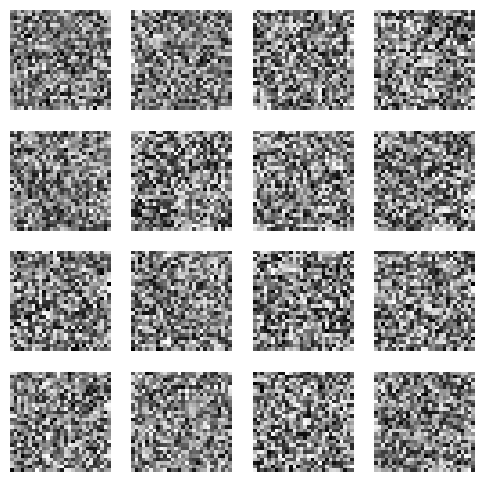

Real images:


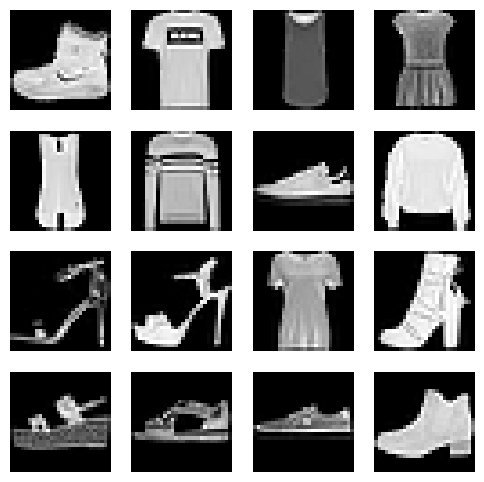

Epoch 2/50 | Gen Loss: 0.7007 | Disc Loss: 1.3974 | Disc Accuracy: 0.4999
Generated images:


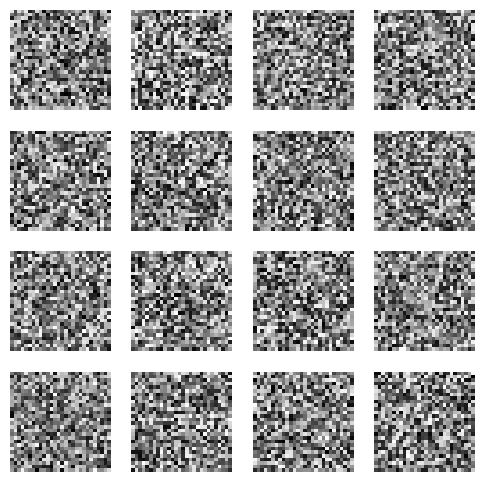

Real images:


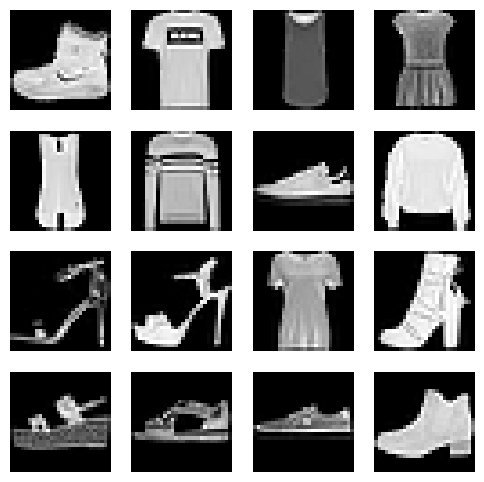

Epoch 3/50 | Gen Loss: 0.6981 | Disc Loss: 1.3933 | Disc Accuracy: 0.4993
Generated images:


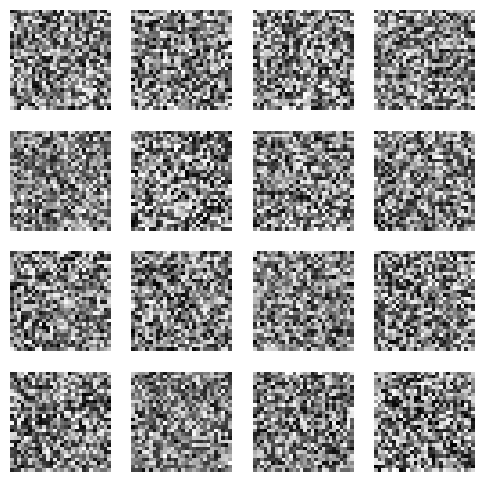

Real images:


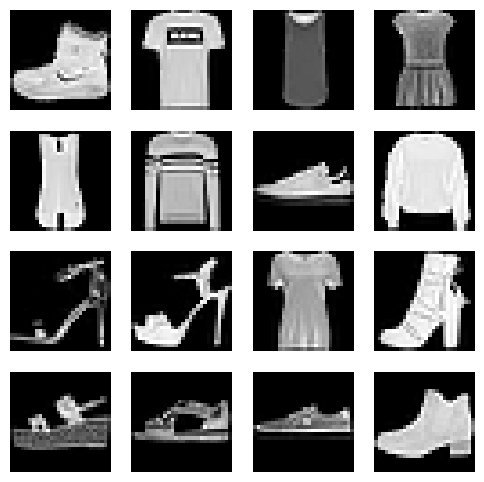

Epoch 4/50 | Gen Loss: 0.6968 | Disc Loss: 1.3913 | Disc Accuracy: 0.5004
Generated images:


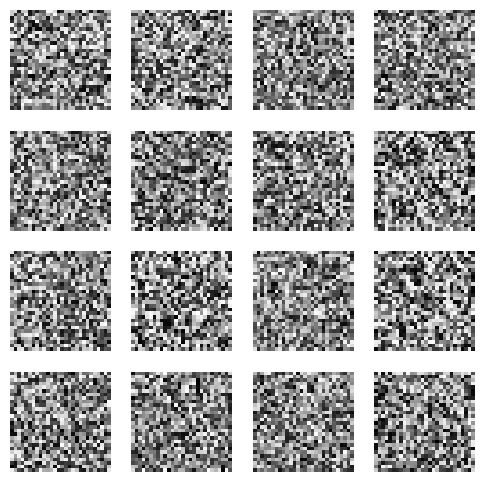

Real images:


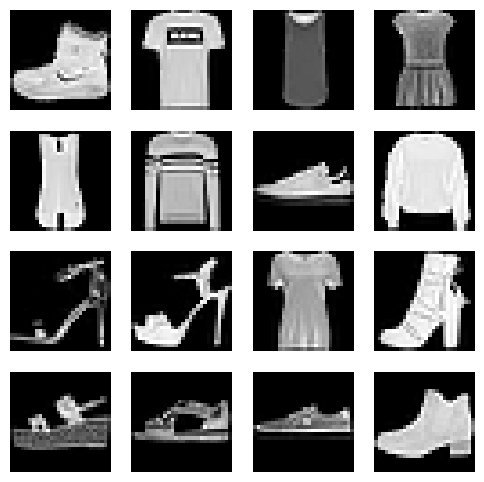

Epoch 5/50 | Gen Loss: 0.6959 | Disc Loss: 1.3901 | Disc Accuracy: 0.5004
Generated images:


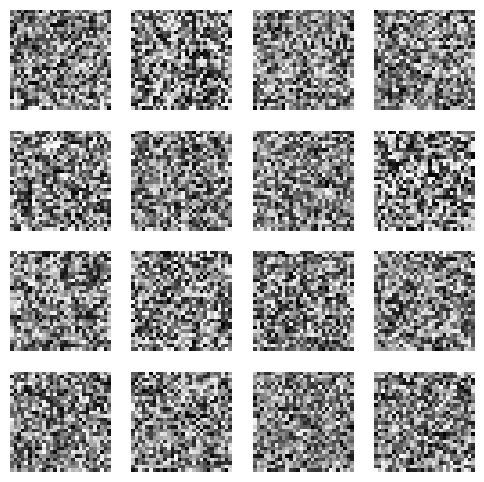

Real images:


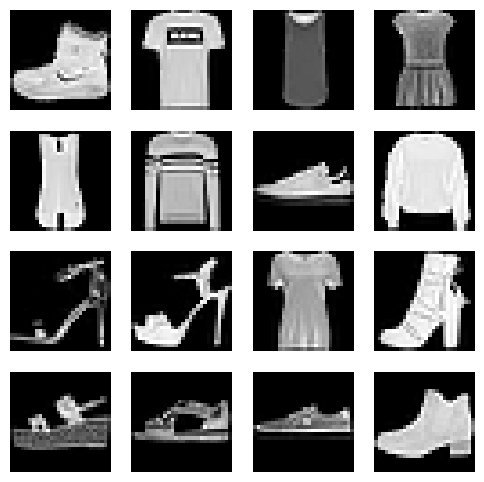

Epoch 6/50 | Gen Loss: 0.6953 | Disc Loss: 1.3893 | Disc Accuracy: 0.5001
Generated images:


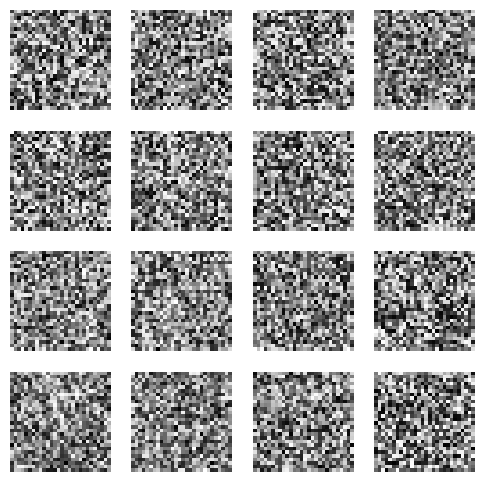

Real images:


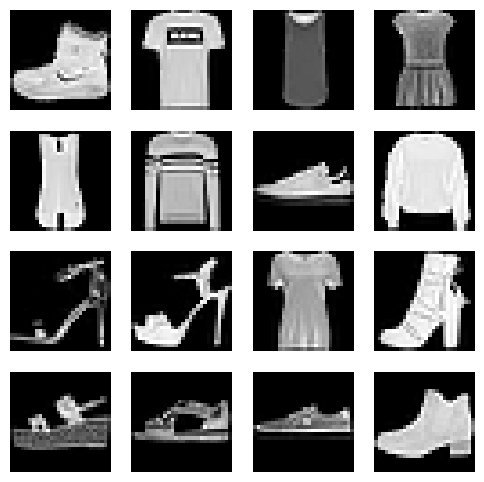

Epoch 7/50 | Gen Loss: 0.6948 | Disc Loss: 1.3886 | Disc Accuracy: 0.5018
Generated images:


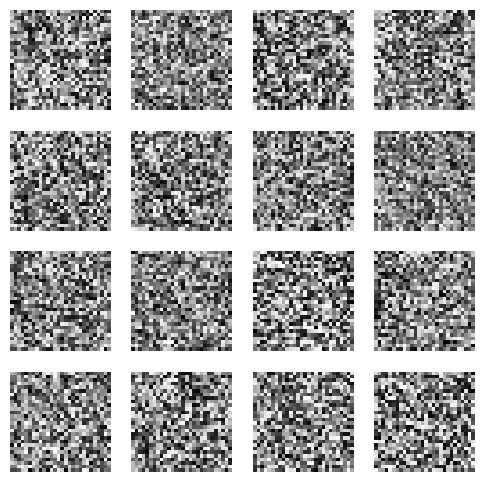

Real images:


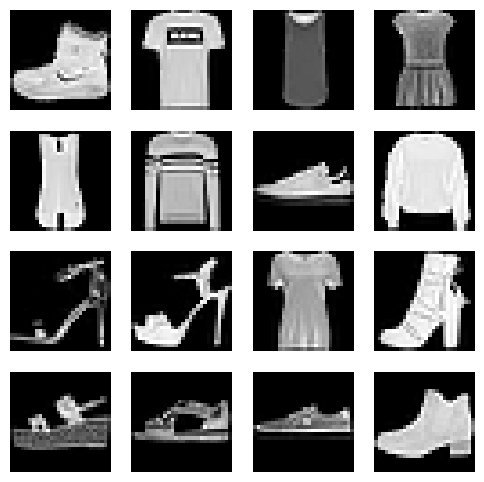

Epoch 8/50 | Gen Loss: 0.6945 | Disc Loss: 1.3882 | Disc Accuracy: 0.5003
Generated images:


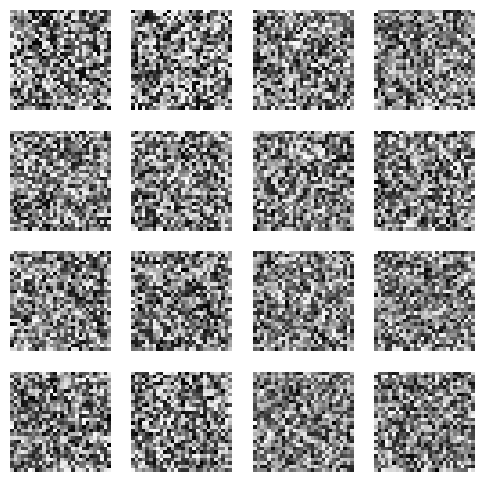

Real images:


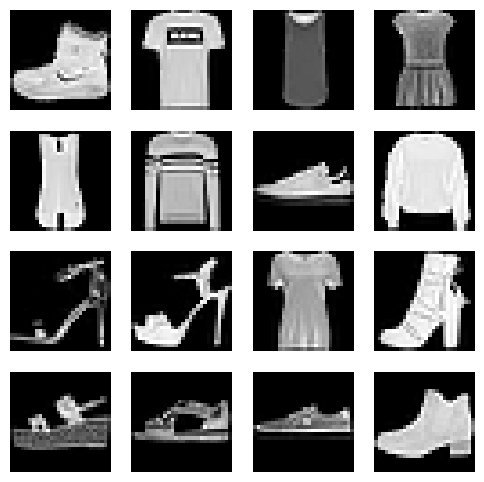

Epoch 9/50 | Gen Loss: 0.6942 | Disc Loss: 1.3878 | Disc Accuracy: 0.4998
Generated images:


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the Fashion-MNIST dataset
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = (X_train - 127.5) / 127.5  # Normalize to [-1, 1] range
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

# Set constants
BATCH_SIZE = 256
NOISE_DIM = 100
EPOCHS = 50  # Increase the number of epochs to train longer for better results

# Prepare the dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(60000).batch(BATCH_SIZE)

# Define the Generator model with Batch Normalization
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, input_shape=(NOISE_DIM,)),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dense(256),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dense(784, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Define the Discriminator model with Batch Normalization
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(256),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dense(128),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create generator and discriminator models
generator = build_generator()
discriminator = build_discriminator()

# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step with discriminator accuracy
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Calculate discriminator accuracy
    real_predictions = tf.round(real_output)  # Round the predictions to get binary labels
    fake_predictions = tf.round(fake_output)

    real_accuracy = tf.reduce_mean(tf.cast(tf.equal(real_predictions, tf.ones_like(real_predictions)), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.equal(fake_predictions, tf.zeros_like(fake_predictions)), tf.float32))

    discriminator_accuracy = (real_accuracy + fake_accuracy) / 2
    return gen_loss, disc_loss, discriminator_accuracy

# Training loop with image display for each epoch
def train(dataset, epochs):
    for epoch in range(epochs):
        epoch_gen_loss = 0
        epoch_disc_loss = 0
        epoch_disc_accuracy = 0
        for image_batch in dataset:
            gen_loss, disc_loss, disc_accuracy = train_step(image_batch)
            epoch_gen_loss += gen_loss
            epoch_disc_loss += disc_loss
            epoch_disc_accuracy += disc_accuracy

        # Average losses and accuracy for the epoch
        epoch_gen_loss /= len(dataset)
        epoch_disc_loss /= len(dataset)
        epoch_disc_accuracy /= len(dataset)

        print(f"Epoch {epoch + 1}/{epochs} | Gen Loss: {epoch_gen_loss:.4f} | Disc Loss: {epoch_disc_loss:.4f} | Disc Accuracy: {epoch_disc_accuracy:.4f}")

        # Display generated images at this stage
        display_images_comparison(generator)

# Generate and display synthetic images and compare with real images
def display_images_comparison(model, num_images=16):
    # Generate synthetic images
    noise = tf.random.normal([num_images, NOISE_DIM])
    generated_images = model(noise, training=False)

    # Display generated images
    print("Generated images:")
    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        ax.axis('off')
    plt.show()

    # Display real images for comparison
    print("Real images:")
    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(X_train[i].reshape(28, 28) * 127.5 + 127.5, cmap='gray')
        ax.axis('off')
    plt.show()

# Start training the GAN
train(train_dataset, EPOCHS)



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape the images to add the channel dimension (grayscale images have 1 channel)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define the CNN model
def build_cnn_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output of convolutional layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    model.add(layers.Dense(10, activation='softmax'))  # 10 output units for 10 classes

    return model

# Build the model
model = build_cnn_model()

# Compile the model with an Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot the training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10


KeyboardInterrupt: 

938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6424 - loss: 0.9777 - val_accuracy: 0.8229 - val_loss: 0.4770


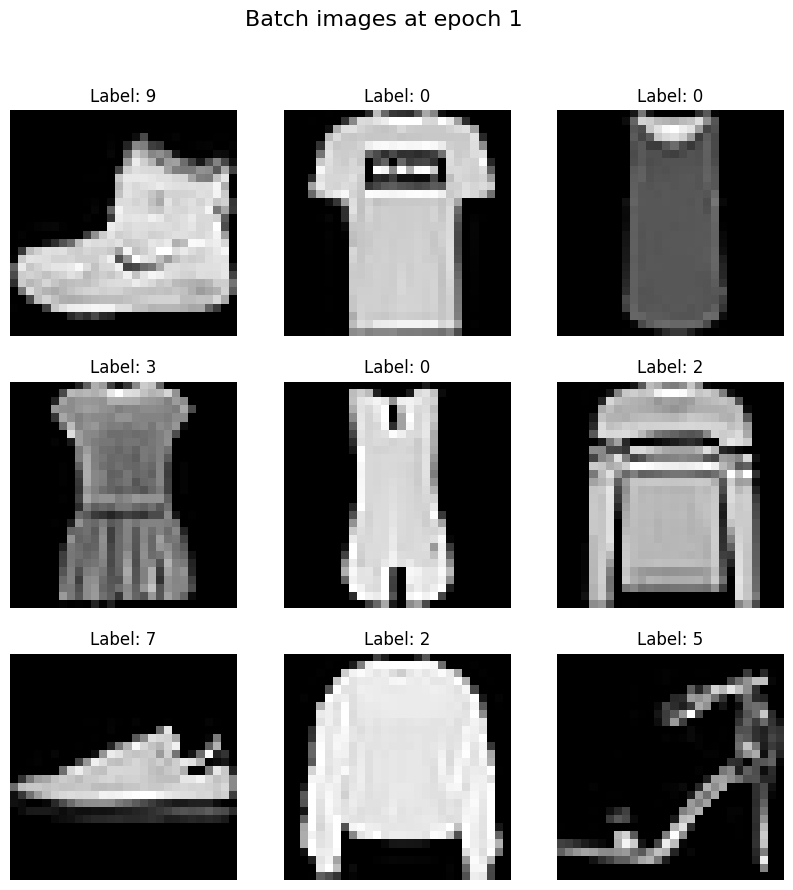

Epoch 1/20 - Test accuracy: 82.29%
Stopping early at epoch 1 due to 80% accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8254 - loss: 0.4810
Final Test accuracy: 82.29%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape the images to add the channel dimension (grayscale images have 1 channel)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define the CNN model
def build_cnn_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output of convolutional layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    model.add(layers.Dense(10, activation='softmax'))  # 10 output units for 10 classes

    return model

# Build the model
model = build_cnn_model()

# Compile the model with an Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Function to plot images in each epoch
def plot_images(X_batch, y_batch, epoch):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {y_batch[i]}')
        plt.axis('off')
    plt.suptitle(f'Batch images at epoch {epoch + 1}', fontsize=16)
    plt.show()

# Train the model with image display in each epoch
def train_and_display_images(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=64):
    for epoch in range(epochs):
        # Train the model for one epoch
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_data=(X_test, y_test))

        # Display images after each epoch (showing a batch of 9 images from the first batch)
        plot_images(X_train[:9], y_train[:9], epoch)

        # Evaluate the model on the test set
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        print(f"Epoch {epoch + 1}/{epochs} - Test accuracy: {test_acc * 100:.2f}%")

        # Stop early if the accuracy exceeds 80% (to avoid unnecessary epochs)
        if test_acc >= 0.80:
            print(f"Stopping early at epoch {epoch + 1} due to 80% accuracy")
            break

# Train the model and display images at each epoch
train_and_display_images(model, X_train, y_train, X_test, y_test, epochs=20)

# Evaluate final model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Final Test accuracy: {test_acc * 100:.2f}%")



938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6305 - loss: 0.9993 - val_accuracy: 0.8247 - val_loss: 0.4881
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


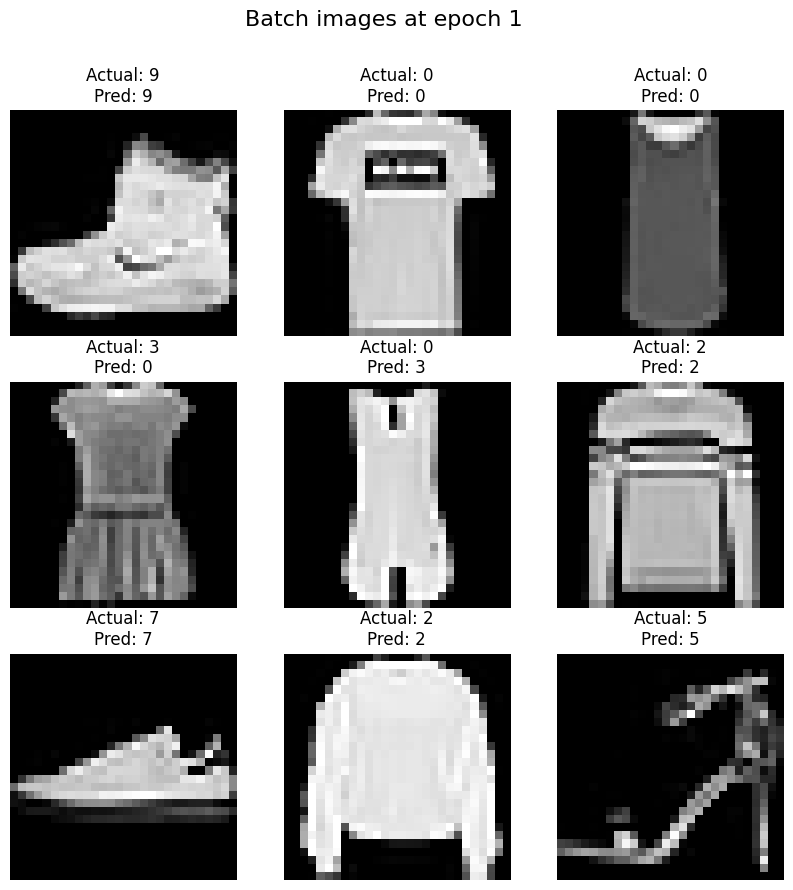

Epoch 1/20 - Test accuracy: 82.47%
Stopping early at epoch 1 due to 80% accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8295 - loss: 0.4926
Final Test accuracy: 82.47%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape the images to add the channel dimension (grayscale images have 1 channel)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


def build_cnn_model():
    model = models.Sequential()

    #
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output of convolutional layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    model.add(layers.Dense(10, activation='softmax'))  # 10 output units for 10 classes

    return model

# Build the model
model = build_cnn_model()

# Compile the model with an Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Function to plot actual and predicted images in each epoch
def plot_images_with_predictions(X_batch, y_batch, predictions, epoch):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.title(f'Actual: {y_batch[i]}\nPred: {np.argmax(predictions[i])}')
        plt.axis('off')
    plt.suptitle(f'Batch images at epoch {epoch + 1}', fontsize=16)
    plt.show()

# Train the model with image display in each epoch
def train_and_display_images(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=64):
    for epoch in range(epochs):
        # Train the model for one epoch
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_data=(X_test, y_test))

        # Predict the labels for the first batch of training images
        predictions = model.predict(X_train[:9])

        # Display images along with actual and predicted labels
        plot_images_with_predictions(X_train[:9], y_train[:9], predictions, epoch)

        # Evaluate the model on the test set
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        print(f"Epoch {epoch + 1}/{epochs} - Test accuracy: {test_acc * 100:.2f}%")

        # Stop early if the accuracy exceeds 80% (to avoid unnecessary epochs)
        if test_acc >= 0.80:
            print(f"Stopping early at epoch {epoch + 1} due to 80% accuracy")
            break

# Train the model and display images at each epoch
train_and_display_images(model, X_train, y_train, X_test, y_test, epochs=20)

# Evaluate final model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Final Test accuracy: {test_acc * 100:.2f}%")


938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6479 - loss: 0.9791 - val_accuracy: 0.8260 - val_loss: 0.4763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


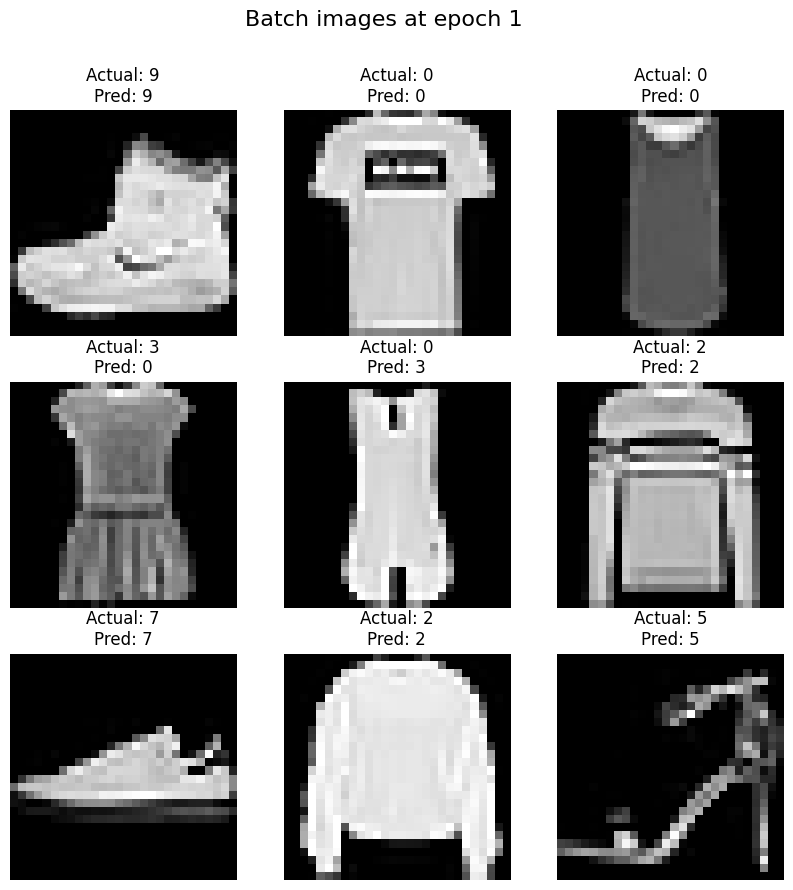

Epoch 1/20 - Test accuracy: 82.60%
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8330 - loss: 0.4689 - val_accuracy: 0.8545 - val_loss: 0.3972
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


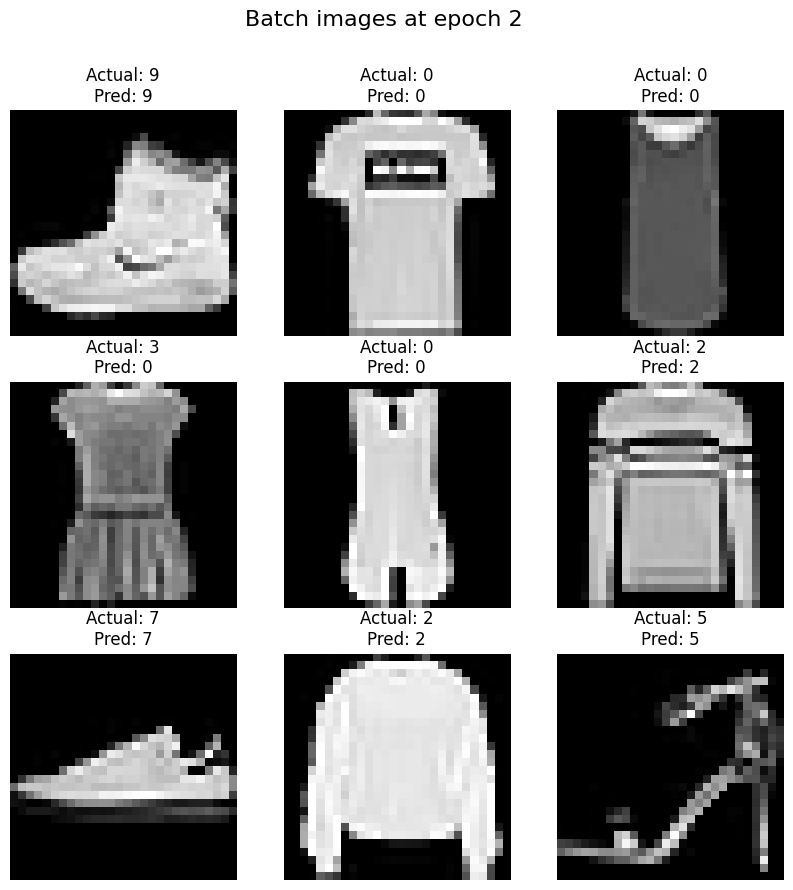

Epoch 2/20 - Test accuracy: 85.45%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8574 - loss: 0.3928 - val_accuracy: 0.8623 - val_loss: 0.3711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


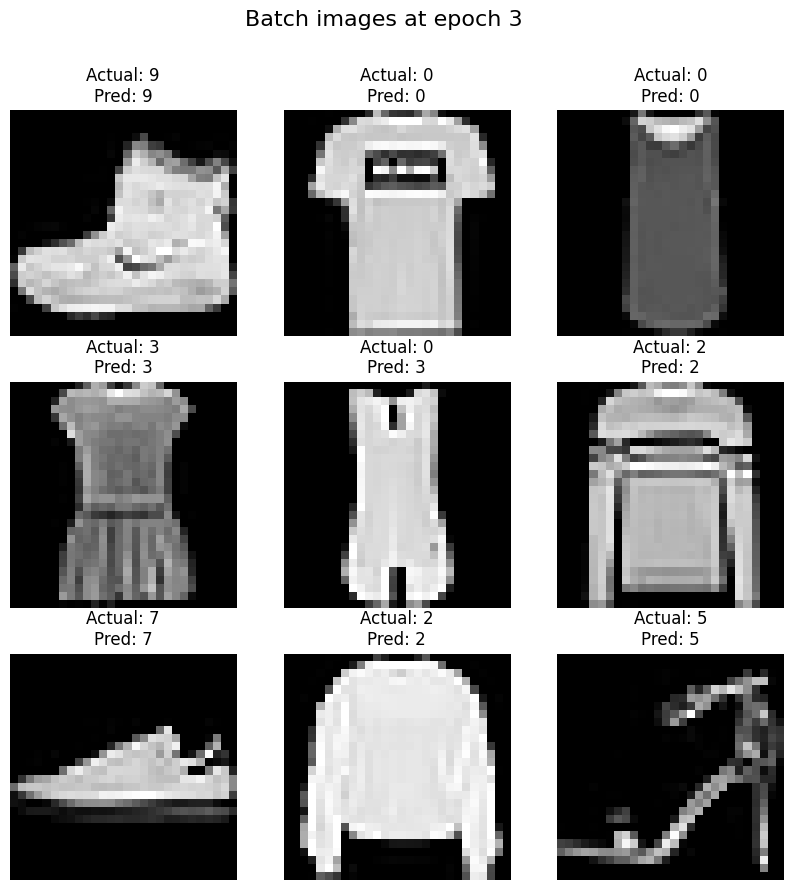

Epoch 3/20 - Test accuracy: 86.23%
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8712 - loss: 0.3537 - val_accuracy: 0.8756 - val_loss: 0.3378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


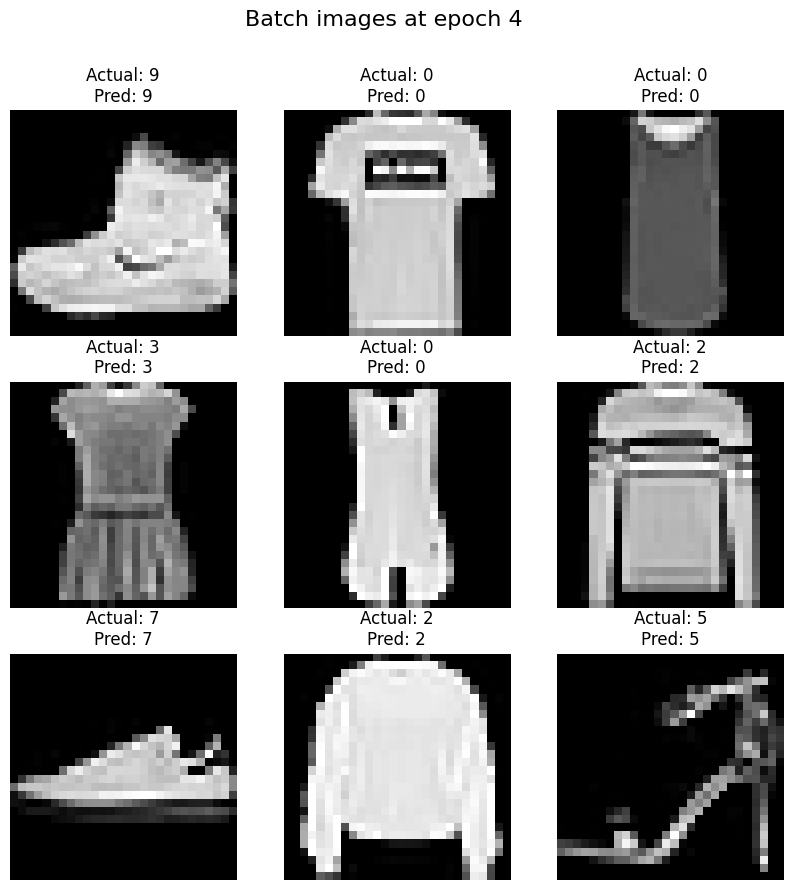

Epoch 4/20 - Test accuracy: 87.56%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8847 - loss: 0.3176 - val_accuracy: 0.8806 - val_loss: 0.3234
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


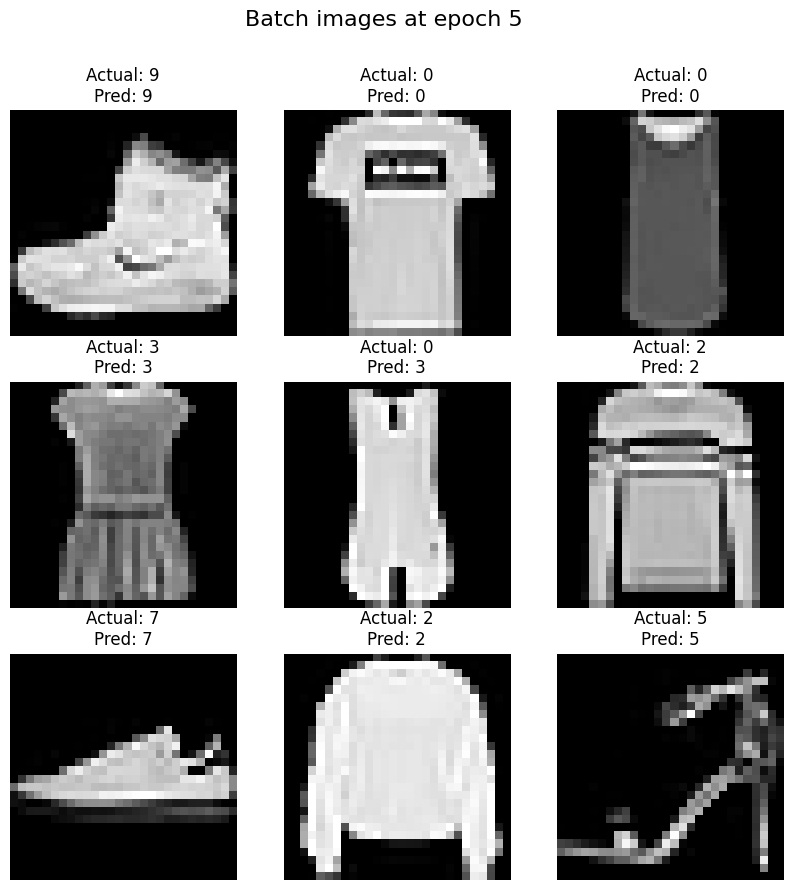

Epoch 5/20 - Test accuracy: 88.06%
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8939 - loss: 0.2928 - val_accuracy: 0.8740 - val_loss: 0.3422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


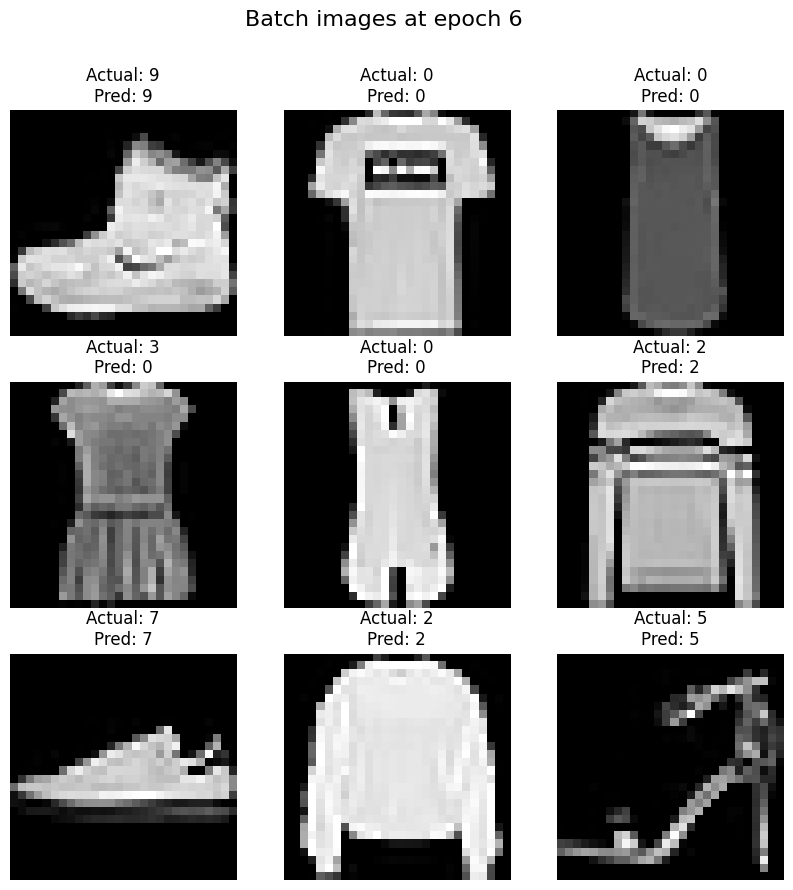

Epoch 6/20 - Test accuracy: 87.40%
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9012 - loss: 0.2707 - val_accuracy: 0.8862 - val_loss: 0.3024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


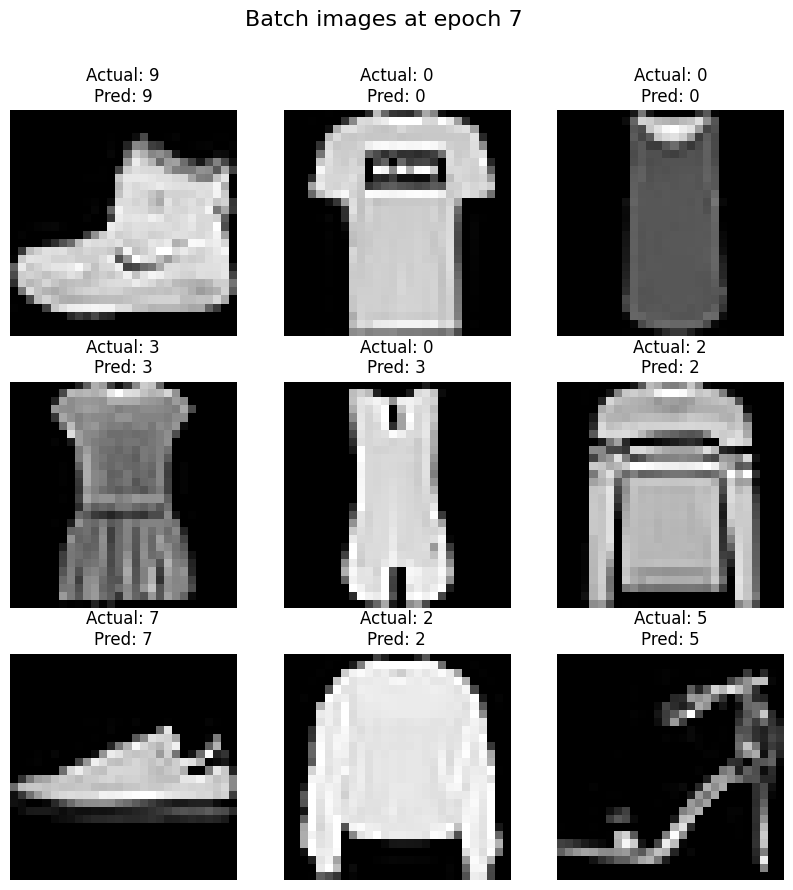

Epoch 7/20 - Test accuracy: 88.62%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9086 - loss: 0.2525 - val_accuracy: 0.8863 - val_loss: 0.3100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


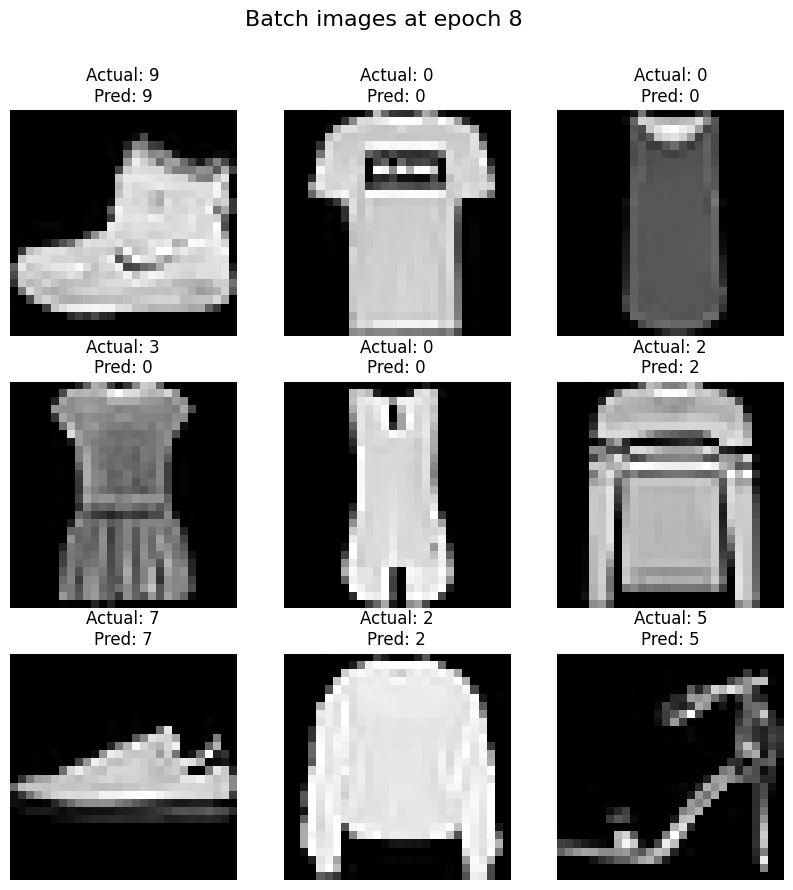

Epoch 8/20 - Test accuracy: 88.63%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9119 - loss: 0.2370 - val_accuracy: 0.8937 - val_loss: 0.2961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


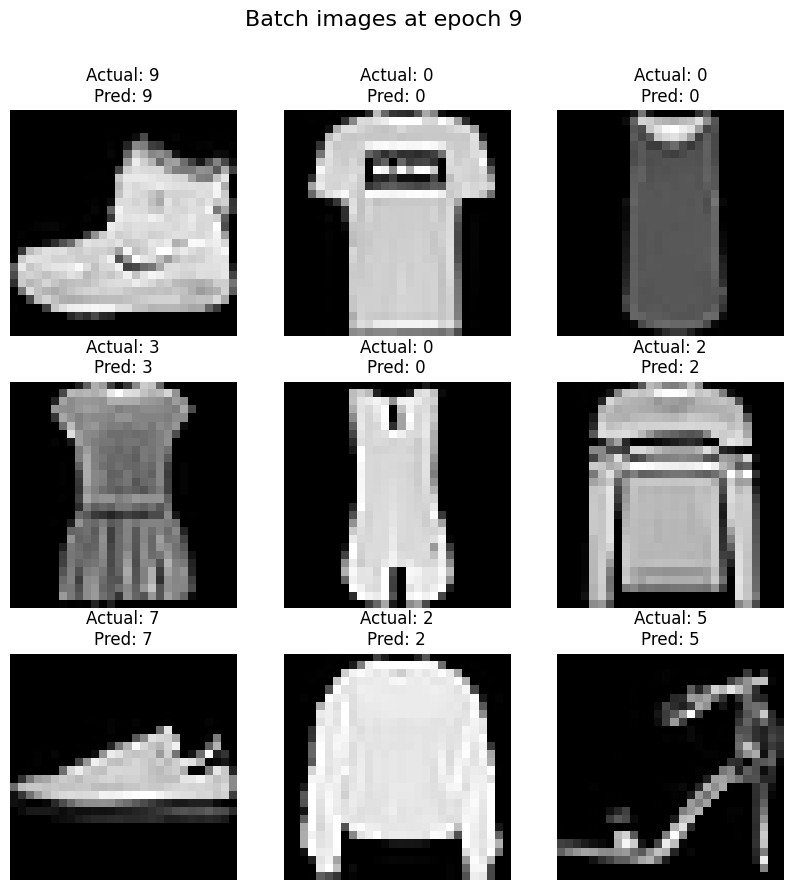

Epoch 9/20 - Test accuracy: 89.37%
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9162 - loss: 0.2255 - val_accuracy: 0.8930 - val_loss: 0.3043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


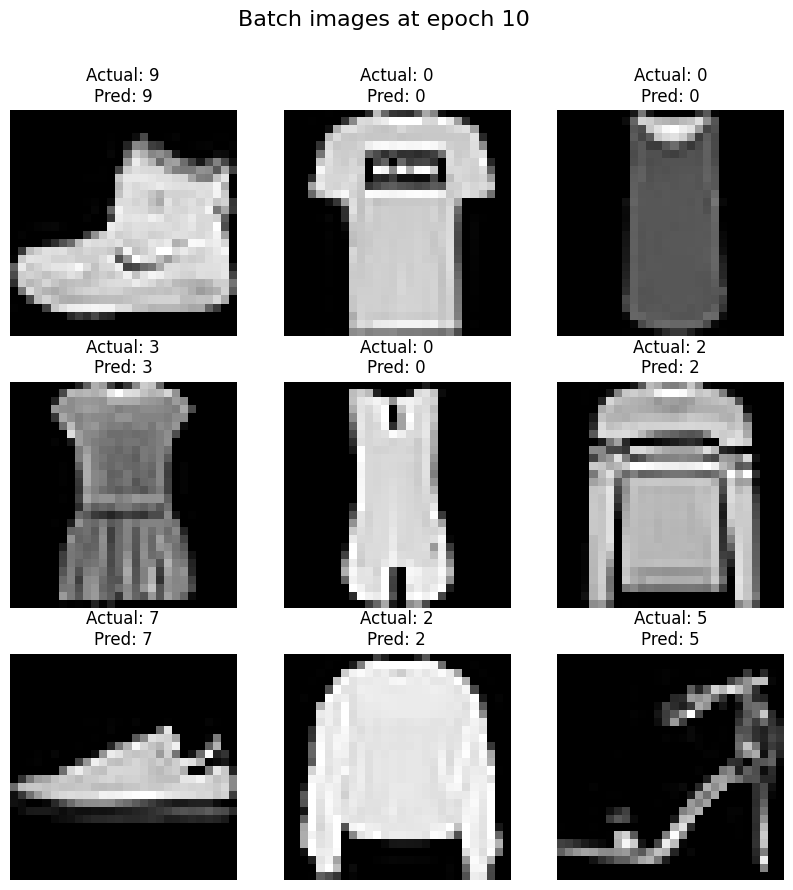

Epoch 10/20 - Test accuracy: 89.30%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9225 - loss: 0.2096 - val_accuracy: 0.8938 - val_loss: 0.3139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


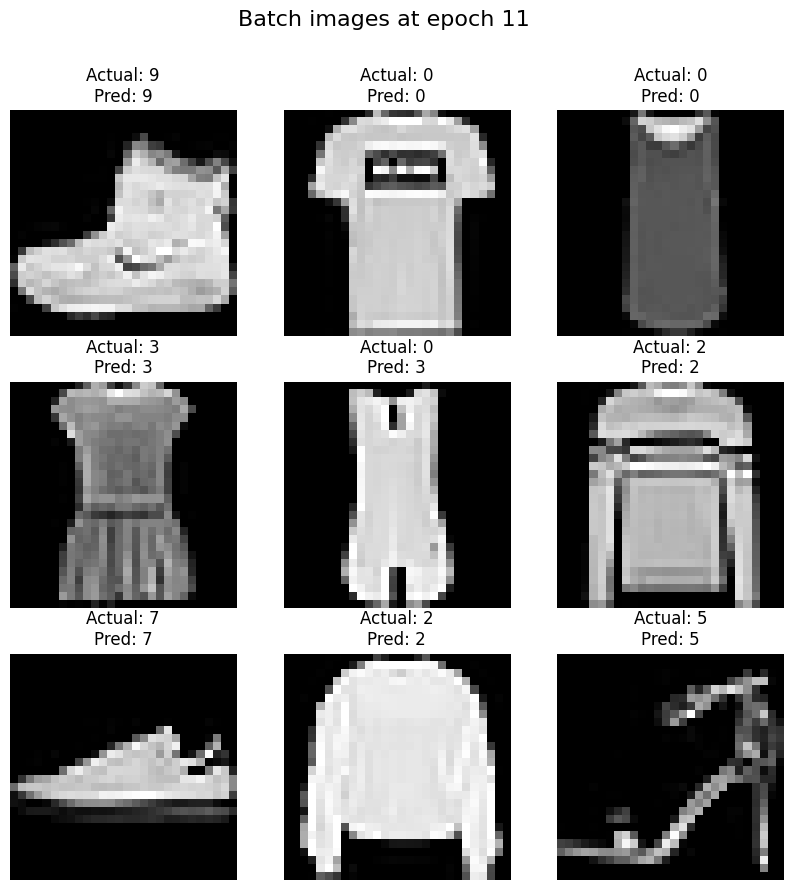

Epoch 11/20 - Test accuracy: 89.38%
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9260 - loss: 0.1990 - val_accuracy: 0.8940 - val_loss: 0.3161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


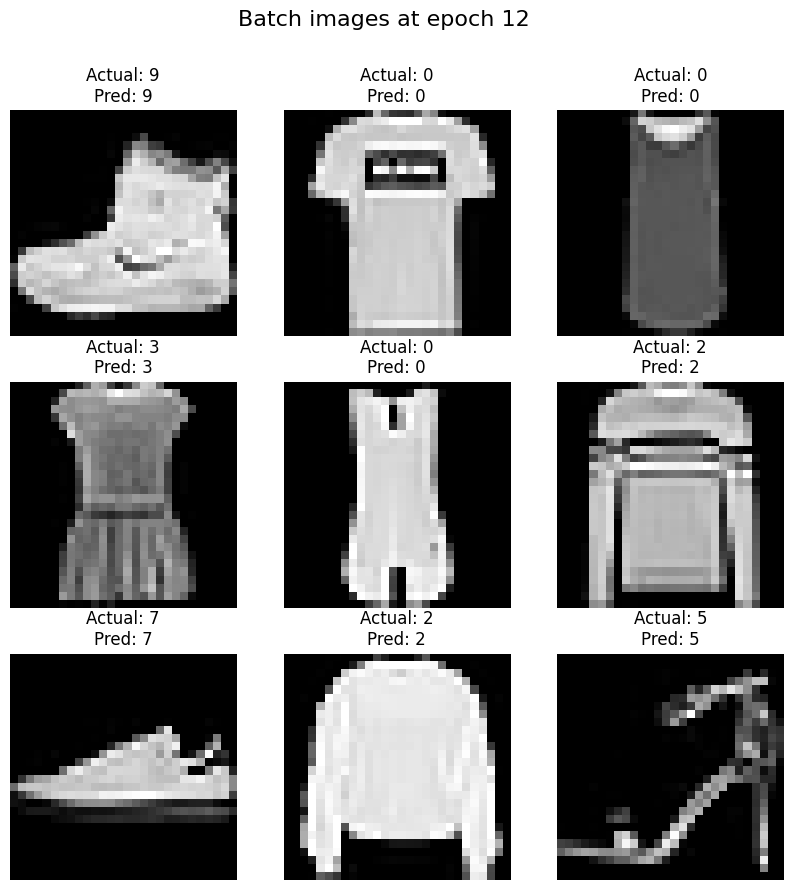

Epoch 12/20 - Test accuracy: 89.40%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9302 - loss: 0.1902 - val_accuracy: 0.8913 - val_loss: 0.3304
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


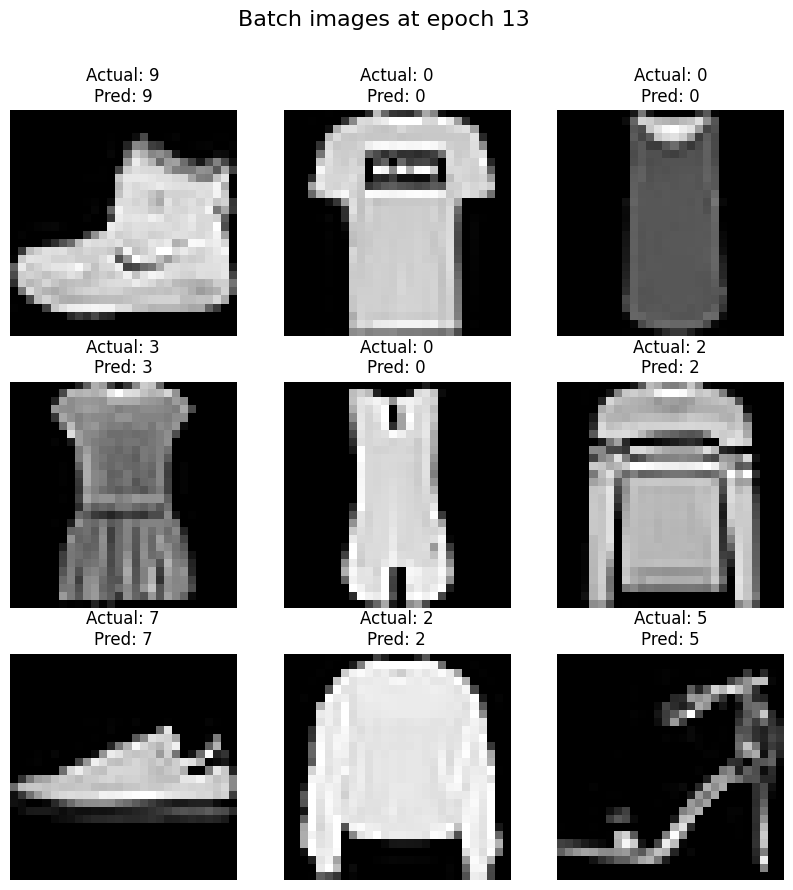

Epoch 13/20 - Test accuracy: 89.13%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9336 - loss: 0.1793 - val_accuracy: 0.8940 - val_loss: 0.3348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


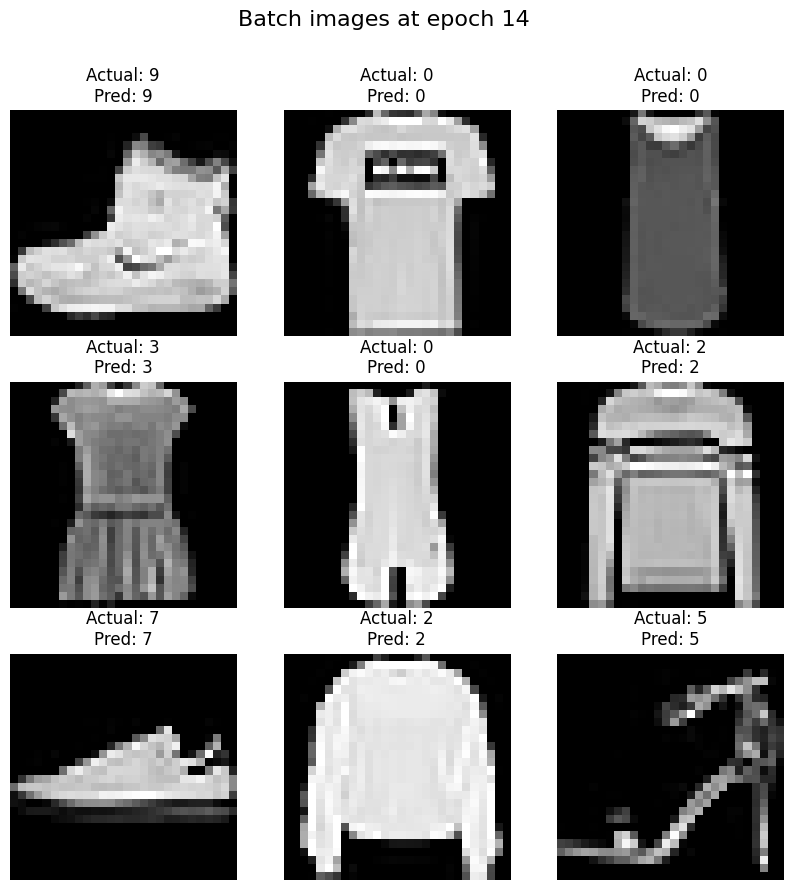

Epoch 14/20 - Test accuracy: 89.40%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9382 - loss: 0.1706 - val_accuracy: 0.8897 - val_loss: 0.3256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


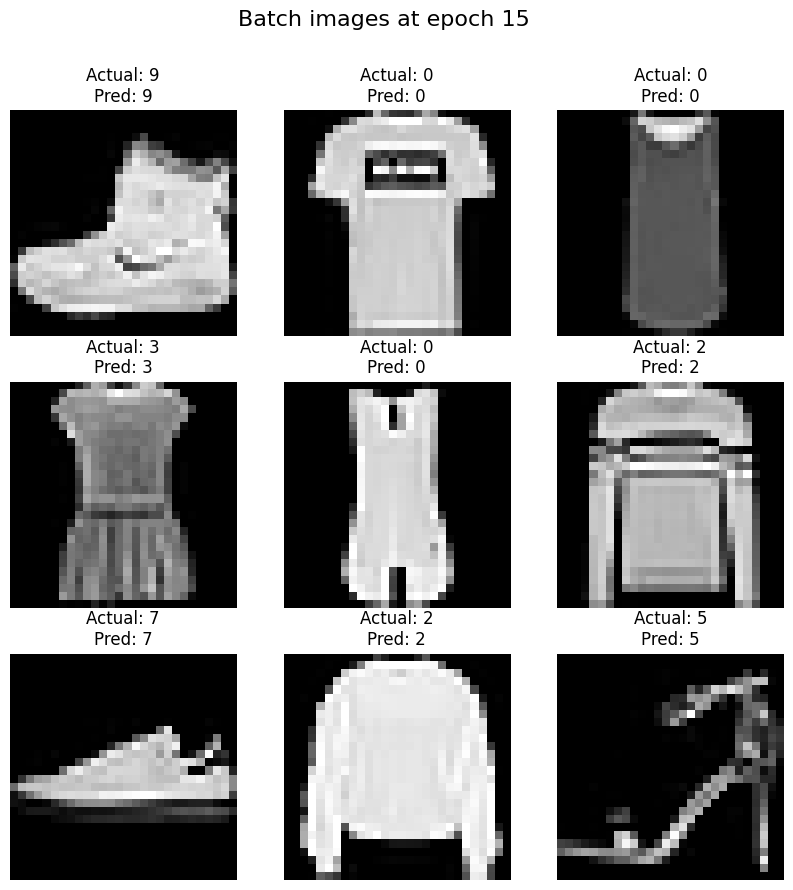

Epoch 15/20 - Test accuracy: 88.97%
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9389 - loss: 0.1655 - val_accuracy: 0.8955 - val_loss: 0.3371
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


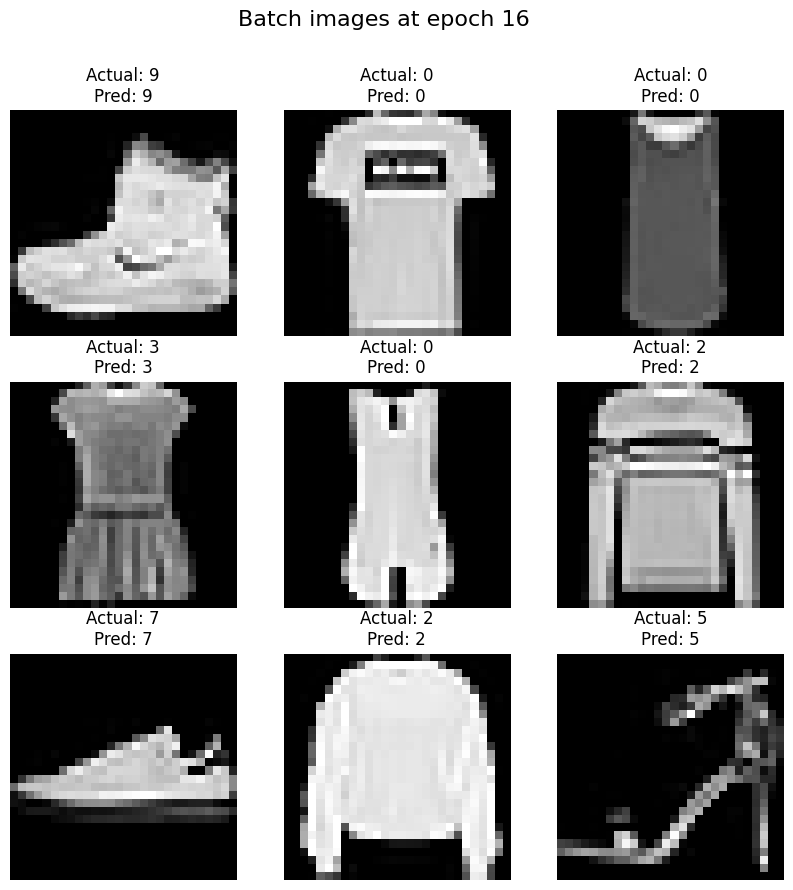

Epoch 16/20 - Test accuracy: 89.55%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9429 - loss: 0.1526 - val_accuracy: 0.8971 - val_loss: 0.3417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


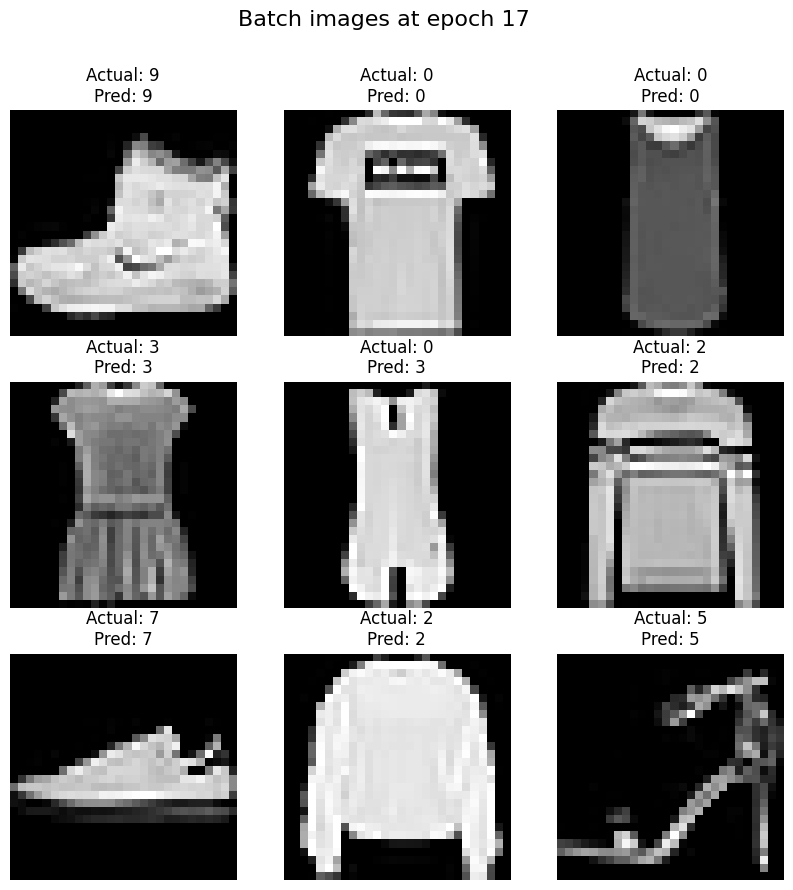

Epoch 17/20 - Test accuracy: 89.71%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9475 - loss: 0.1396 - val_accuracy: 0.9021 - val_loss: 0.3403
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


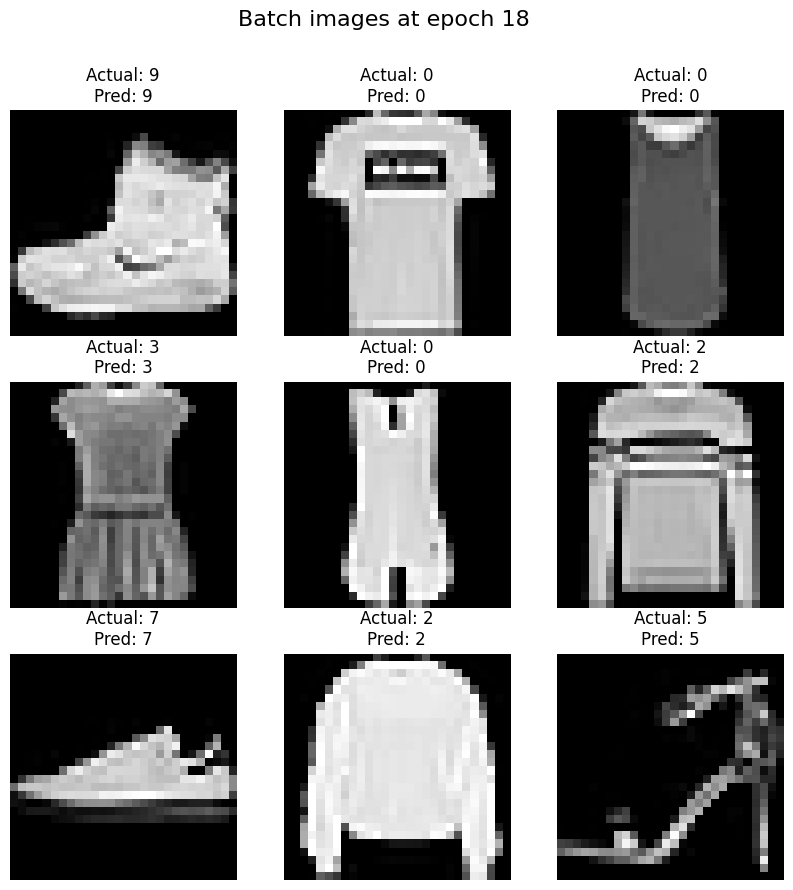

Epoch 18/20 - Test accuracy: 90.21%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9483 - loss: 0.1354 - val_accuracy: 0.8926 - val_loss: 0.3948
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


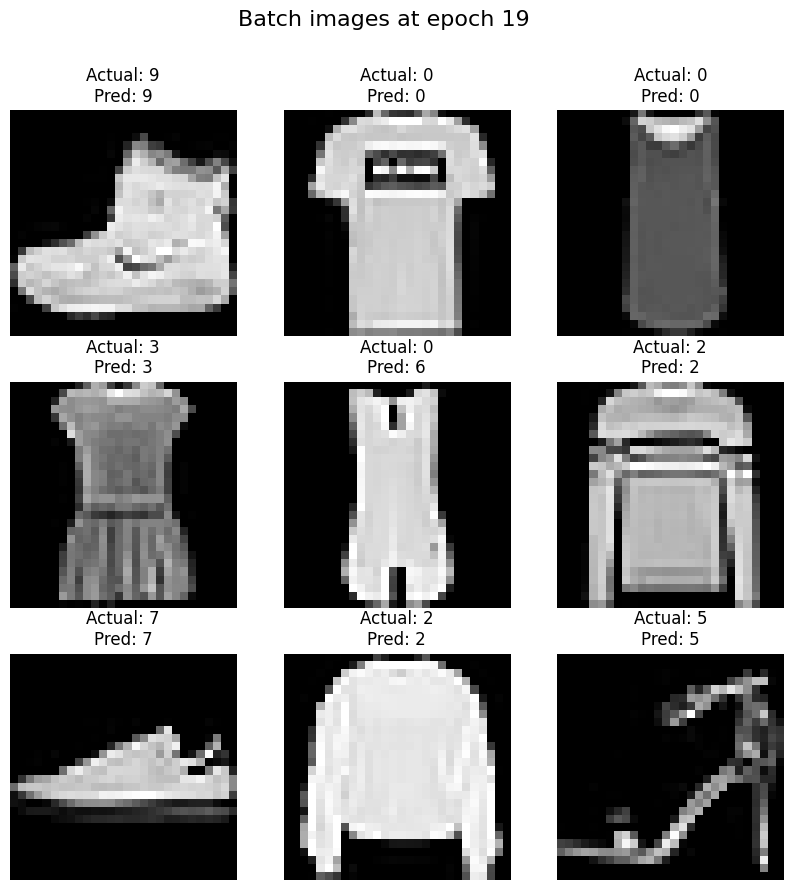

Epoch 19/20 - Test accuracy: 89.26%
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9515 - loss: 0.1268 - val_accuracy: 0.8882 - val_loss: 0.4065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


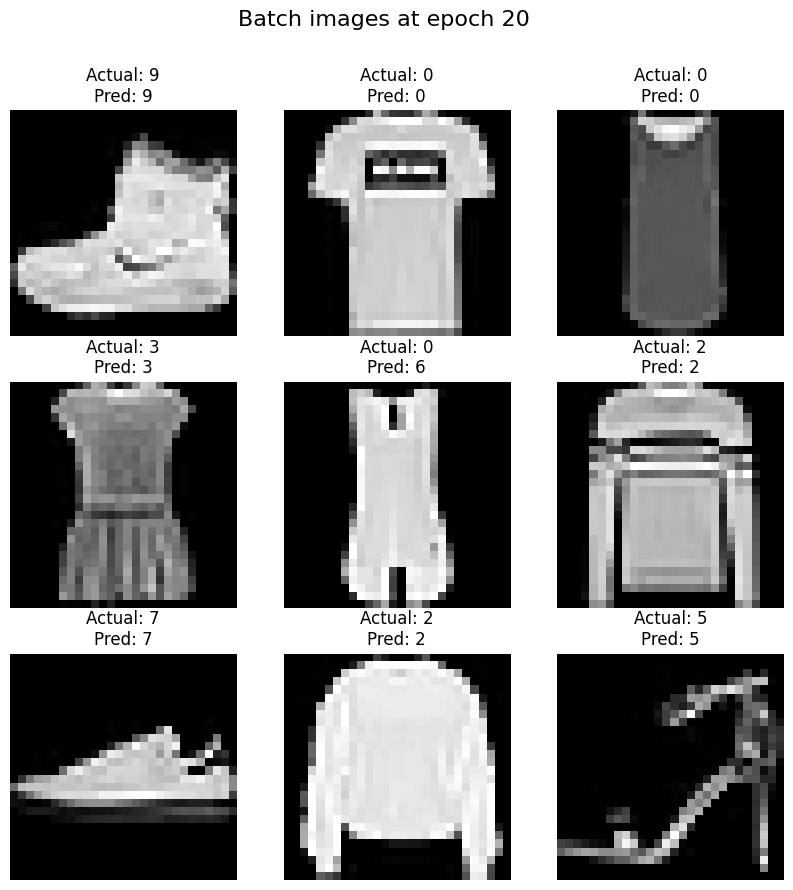

Epoch 20/20 - Test accuracy: 88.82%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8889 - loss: 0.4230
Final Test accuracy: 88.82%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape the images to add the channel dimension (grayscale images have 1 channel)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


def build_cnn_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output of convolutional layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    model.add(layers.Dense(10, activation='softmax'))  # 10 output units for 10 classes

    return model

# Build the model
model = build_cnn_model()

# Compile the model with an Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Function to plot actual and predicted images in each epoch
def plot_images_with_predictions(X_batch, y_batch, predictions, epoch):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.title(f'Actual: {y_batch[i]}\nPred: {np.argmax(predictions[i])}')
        plt.axis('off')
    plt.suptitle(f'Batch images at epoch {epoch + 1}', fontsize=16)
    plt.show()

# Train the model with image display in each epoch
def train_and_display_images(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=64):
    for epoch in range(epochs):
        # Train the model for one epoch
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_data=(X_test, y_test))

        # Predict the labels for the first batch of training images
        predictions = model.predict(X_train[:9])

        # Display images along with actual and predicted labels
        plot_images_with_predictions(X_train[:9], y_train[:9], predictions, epoch)

        # Evaluate the model on the test set
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        print(f"Epoch {epoch + 1}/{epochs} - Test accuracy: {test_acc * 100:.2f}%")

        # Remove early stopping, let all epochs run

# Train the model and display images at each epoch
train_and_display_images(model, X_train, y_train, X_test, y_test, epochs=20)

# Evaluate final model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Final Test accuracy: {test_acc * 100:.2f}%")
